# Что мы здесь делаем?

Аналитики на рабочем месте делают много вещей - как вы могли заметить на протяжении всего курса. Мы и дашборды делаем, и в данных копаемся, и AB-тесты проводим...но почему мы это делаем? 

Само собой, чтобы улучшить какие-то характеристики нашего продукта и максимизировать прибыль! Но как мы это делаем? По сути своей, мы занимаемся интерпретацией данных, чтобы на её основе дать какие-то **предсказание**.

Вообще при всей кажущейся близости объяснения и предсказания между ними есть странное расхождение. И это расхождение ярко проявляется в ролях **аналитика** и **ML-инженера**:

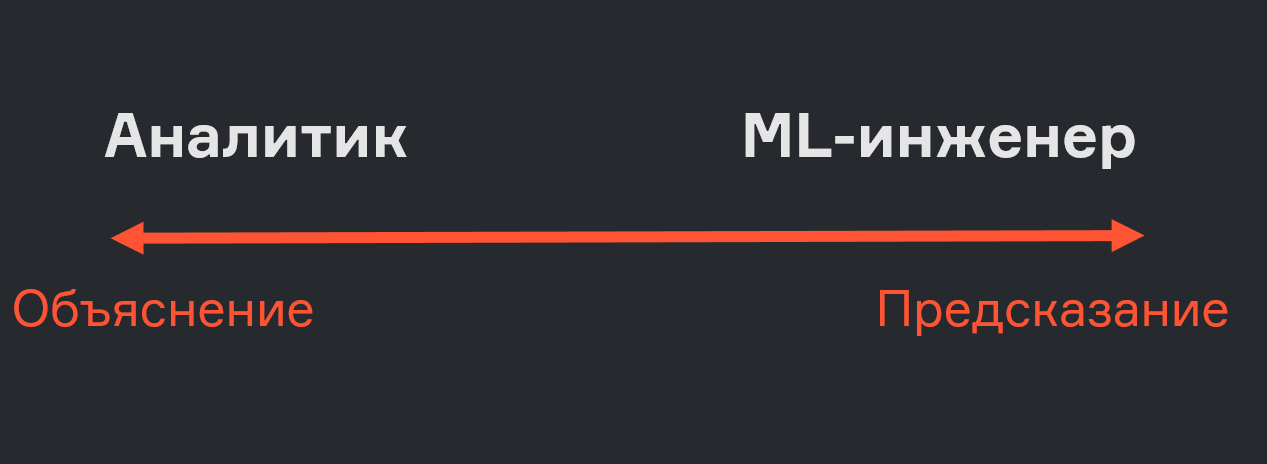

Главная задача аналитика - **находить инсайты в данных**. Для него важнее *объяснение*.

Главная задача ML-инженера - **создать эффективную модель**. Для него важнее *предсказание*.

Известно, что самые лучшие предсказательные модели чаще всего являются "чёрными коробками" - никто не может понять, как модель пришла к такому выводу. И наоборот - часто методы, дающие нам наиболее легко интерпретируемую информацию, крайне далеки от сложности реального мира.

И в попытке взять лучшее из обоих миров рождается **предиктивная аналитика**.

## Предсказание или прогноз?

На самом деле это не равные понятия! Предсказанием, например, может быть результат линейной регрессии веса по росту. Прогноз же всегда **предсказание будущего**, и если мы подходим к этому вопросу формально, то нам не избежать *временных рядов*.

Есть ряд компаний, которые решили максимально упростить и стандартизовать процесс построения прогнозных моделей. Мы будем пользоваться наработками компании Uber в виде библиотеки Orbit:

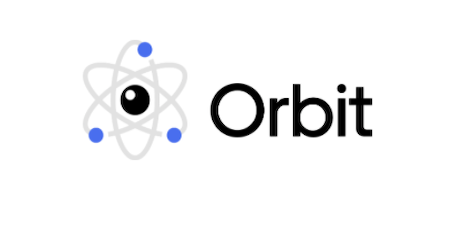

### Что ещё почитать?

* [Список алгоритмов](https://github.com/rob-med/awesome-TS-anomaly-detection) на разных языках для анализа временных рядов - далеко не полный, но от этого не менее полезный! Основной акцент здесь на детекцию аномалий. В одном из последующих уроков вы будете заниматься именно этой задачей - и хотя для сдачи работы вам придётся написать свой алгоритм с нуля, вы можете у себя локально попробовать готовые решения :)
* [Свежая книжка](https://livebook.manning.com/book/time-series-forecasting-in-python-book/chapter-1/v-6/) на Питоне для прогнозирования временных рядов - ссылка ведёт на её открытую электронную версию. Может быть полезна для общего погружения в теорию временных рядов и других методов их пронозирования.
* Если не чураетесь контента на R, то очень горячая рекомендация - [Forecasting: Principles and Practice](https://otexts.com/fpp3/). Содержит очень много визуализаций, практических примеров и советов, и при этом бесплатная.
* Также классика на R - [Анализ временных рядов с помощью R](https://ranalytics.github.io/tsa-with-r/) за авторством Мастицкого. Также может быть полезна, даже если вы никогда не пользовались и не будете пользоваться R, так как содержит хороший обзор возможностей всего того, что можно извлечь из временных рядов.

Отдельно выделим вот эту пару материалов:

* [Сигнал и шум. Почему одни прогнозы сбываются, а другие – нет](https://www.litres.ru/neyt-silver/signal-i-shum-pochemu-odni-prognozy-sbyvautsya-a-drugie-net-2/) - достаточно известный научпоп о прогнозировании и стоящих вокруг него идей. Книга может быть очень полезна для общего кругозора и оптики, через которую стоит глядеть на прогнозы.
* [Choosing prediction over explanation in psychology: Lessons from machine learning](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6603289/) - достаточно известная статья в кругах естественнонаучной ветки психологии, рассматривающая вышеуказанное расхождение между объяснением и предсказанием в контексте научных исследований. Может использоваться как сравнительно лёгкий заход в основные концепции машинного обучения.
* [Убийственные большие данные. Как математика превратилась в оружие массового поражения](https://www.litres.ru/keti-o-nil-17624494/ubiystvennye-bolshie-dannye-kak-matematika-prevratilas/) - а с этим можно ознакомиться, если интересует этический аспект предсказательных моделей в целом.

# Как запустить Orbit

* [Документация](https://orbit-ml.readthedocs.io/en/latest/)
* [Github](https://github.com/uber/orbit)
* [Техблог Uber](https://eng.uber.com/) - там много интересного помимо Orbit
* [Оригинальная статья](https://arxiv.org/abs/2004.08492)

In [1]:
import orbit #общий пакет
from orbit.models import DLT #один из вариантов модели
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components #для рисования предсказаний

#общие штуки для кручения данных
import pandas as pd
import pandahouse as ph
import numpy as np
import os

#общие штуки для рисования
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az #это полезно для визуализации MCMC

ModuleNotFoundError: No module named 'orbit'

In [2]:
#коннект к базе данных

connection = {'host': 'https://clickhouse.lab.karpov.courses,
                      'database':'simulator',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

Давайте для демонстрации выгрузим месячный CTR с часовым разрешением:

In [3]:
query = '''
SELECT 
    toStartOfHour(time) hour_time,
    countIf(action = 'like')/countIf(action = 'view') CTR
FROM 
    simulator.feed_actions_all
WHERE hour_time >= toDateTime('2021-11-19 00:00:00')
  AND hour_time <= toDateTime('2021-12-19 00:00:00')
GROUP BY hour_time
ORDER BY 
    hour_time
'''

In [4]:
activity = ph.read_clickhouse(query=query, connection=connection)
activity.head()

,hour_time,CTR
0,2021-11-19 00:00:00,0.220865
1,2021-11-19 01:00:00,0.216720
2,2021-11-19 02:00:00,0.213163
3,2021-11-19 03:00:00,0.211687
4,2021-11-19 04:00:00,0.216482


In [5]:
#зададим рисовательный шаблон для сиборна
sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")

<AxesSubplot: xlabel='hour_time', ylabel='CTR'>

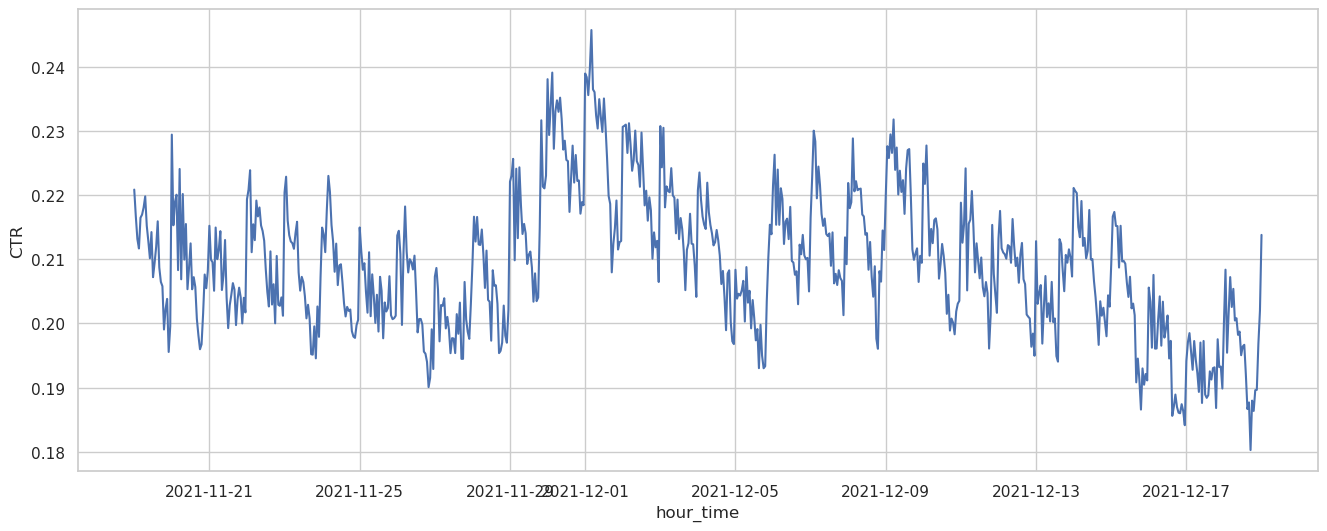

In [6]:
#как менялся CTR
sns.lineplot(x="hour_time", y="CTR", data=activity)

Можно посмотреть, какие компоненты у нас вообще есть в Orbit:

In [7]:
dir(orbit)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'constants',
 'diagnostics',
 'estimators',
 'exceptions',
 'forecaster',
 'models',
 'name',
 'template',
 'utils']

Но не все разделы так видно - например, модуль эксплораторного анализа:

In [8]:
#эксплораторные штуки
from orbit.eda import eda_plot

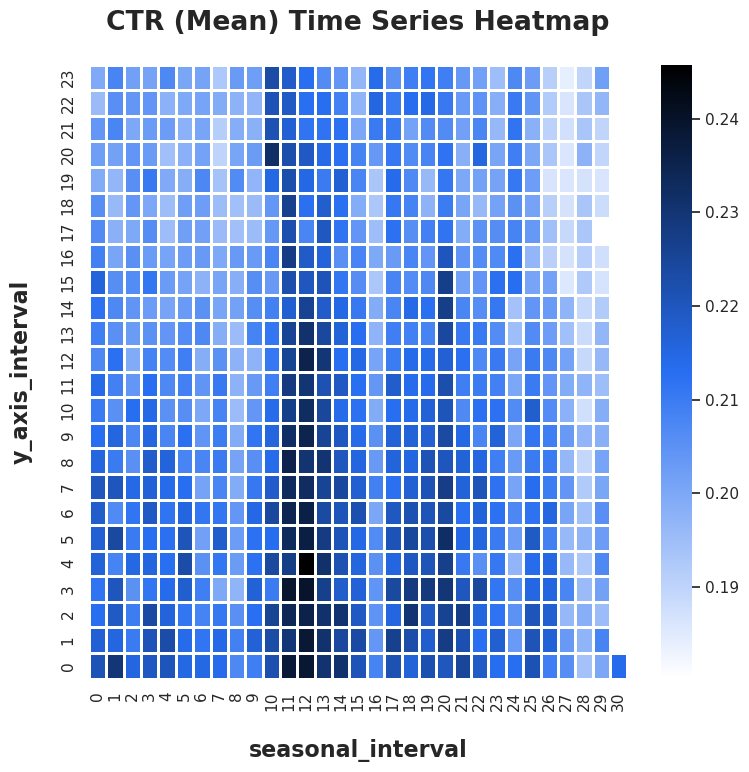

In [9]:
#тепловая карта
_ = eda_plot.ts_heatmap(df=activity, date_col="hour_time", value_col="CTR", seasonal_interval=24, normalization=False)

А вот нормализованный вариант:

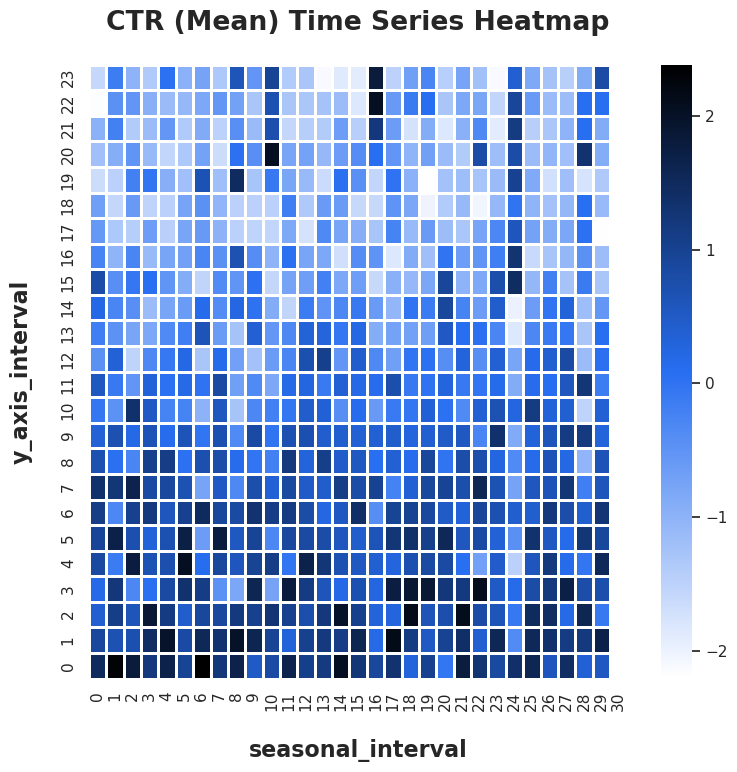

In [10]:
_ = eda_plot.ts_heatmap(df=activity, date_col="hour_time", value_col="CTR", seasonal_interval=24, normalization=True)

## Строим модель

В Orbit есть три основные модели (плюс пара базовых больше для демонстрации):

* **Local-Global Trend** - учитывает как общие глобальные изменения, так и более мелкие локальные - но сами разработчики хотят её упразднить
* **Damped Local Trend** - гибрид предыдущей модели и классического экспоненциального сглаживания + коэффициент угасания тренда
* **Kernel-based time-varying regression** - экспериментальная модель с множественной сезонностью и динамической регрессией (может баговать!)

Используем вторую модель, так как она наиболее отлажена. Для начала инициализируем модель с основными параметрами:

In [11]:
dlt = DLT(response_col="CTR", #название колонки с метрикой
          date_col="hour_time", #название колонки с датами-временем
          seasonality=24, #длина периода сезонности
          estimator="stan-map", #алгоритм оценки
          n_bootstrap_draws=1000) #количество сэмплов бутстрапа для доверительного интервала

INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


А теперь обучаем её на данных. **НЕ ПУГАЙТЕСЬ КУЧИ КРАСНОГО!** Это так модель предварительно компилируется.

In [12]:
dlt.fit(activity)

Теперь нам надо создать датафрейм с *горизонтом прогнозирования* - то есть теми датами, которые мы хотим предсказать! Для этого есть вспомогательный метод `.make_future_df()`:

In [13]:
future_df = dlt.make_future_df(periods=24*7) #горизонт будет 7 дней - то есть 7 раз по 24 часа
future_df.head()

,hour_time
0,2021-12-19 01:00:00
1,2021-12-19 02:00:00
2,2021-12-19 03:00:00
3,2021-12-19 04:00:00
4,2021-12-19 05:00:00


А дальше остаётся только сделать прогноз!

In [14]:
predicted_df = dlt.predict(df=future_df)
predicted_df.head()

,hour_time,prediction_5,prediction,prediction_95
0,2021-12-19 01:00:00,0.204171,0.210710,0.217376
1,2021-12-19 02:00:00,0.202316,0.209417,0.217189
2,2021-12-19 03:00:00,0.200553,0.208693,0.217365
3,2021-12-19 04:00:00,0.199036,0.207201,0.216723
4,2021-12-19 05:00:00,0.199520,0.208015,0.217004


Нарисуем, как он выглядит:

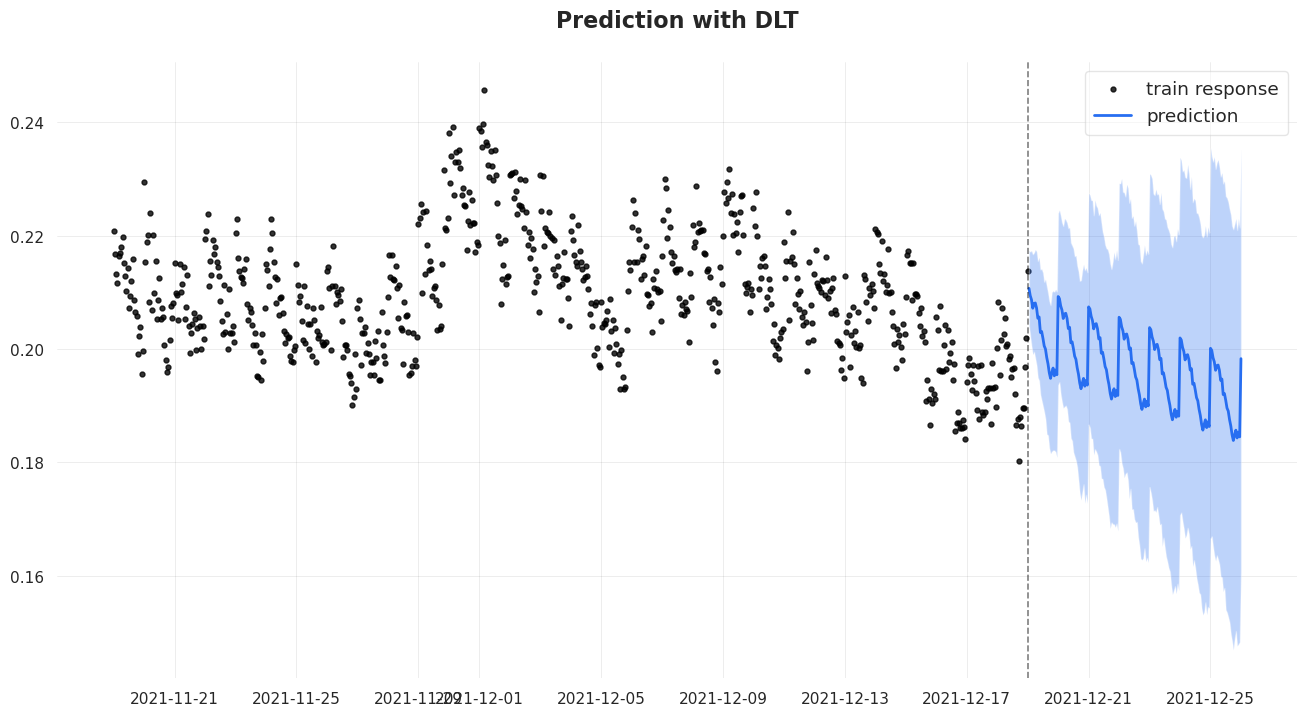

In [15]:
_ = plot_predicted_data(activity, predicted_df, "hour_time", 'CTR', title='Prediction with DLT')

А ещё мы можем нарисовать отдельные компоненты нашей модели:

In [16]:
predicted_df = dlt.predict(df=future_df, 
                           decompose=True) #говорит, что нам нужна декомпозиция предсказания
predicted_df.head()

,hour_time,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95,regression_5,regression,regression_95
0,2021-12-19 01:00:00,0.204022,0.210710,0.217675,0.196435,0.203123,0.210088,0.007586,0.007586,0.007586,0.0,0.0,0.0
1,2021-12-19 02:00:00,0.201567,0.209417,0.217434,0.195201,0.203050,0.211068,0.006366,0.006366,0.006366,0.0,0.0,0.0
2,2021-12-19 03:00:00,0.200285,0.208693,0.217357,0.194569,0.202977,0.211642,0.005716,0.005716,0.005716,0.0,0.0,0.0
3,2021-12-19 04:00:00,0.199232,0.207201,0.215399,0.194934,0.202903,0.211101,0.004298,0.004298,0.004298,0.0,0.0,0.0
4,2021-12-19 05:00:00,0.199428,0.208015,0.216739,0.194241,0.202828,0.211553,0.005187,0.005187,0.005187,0.0,0.0,0.0


Рисуем:

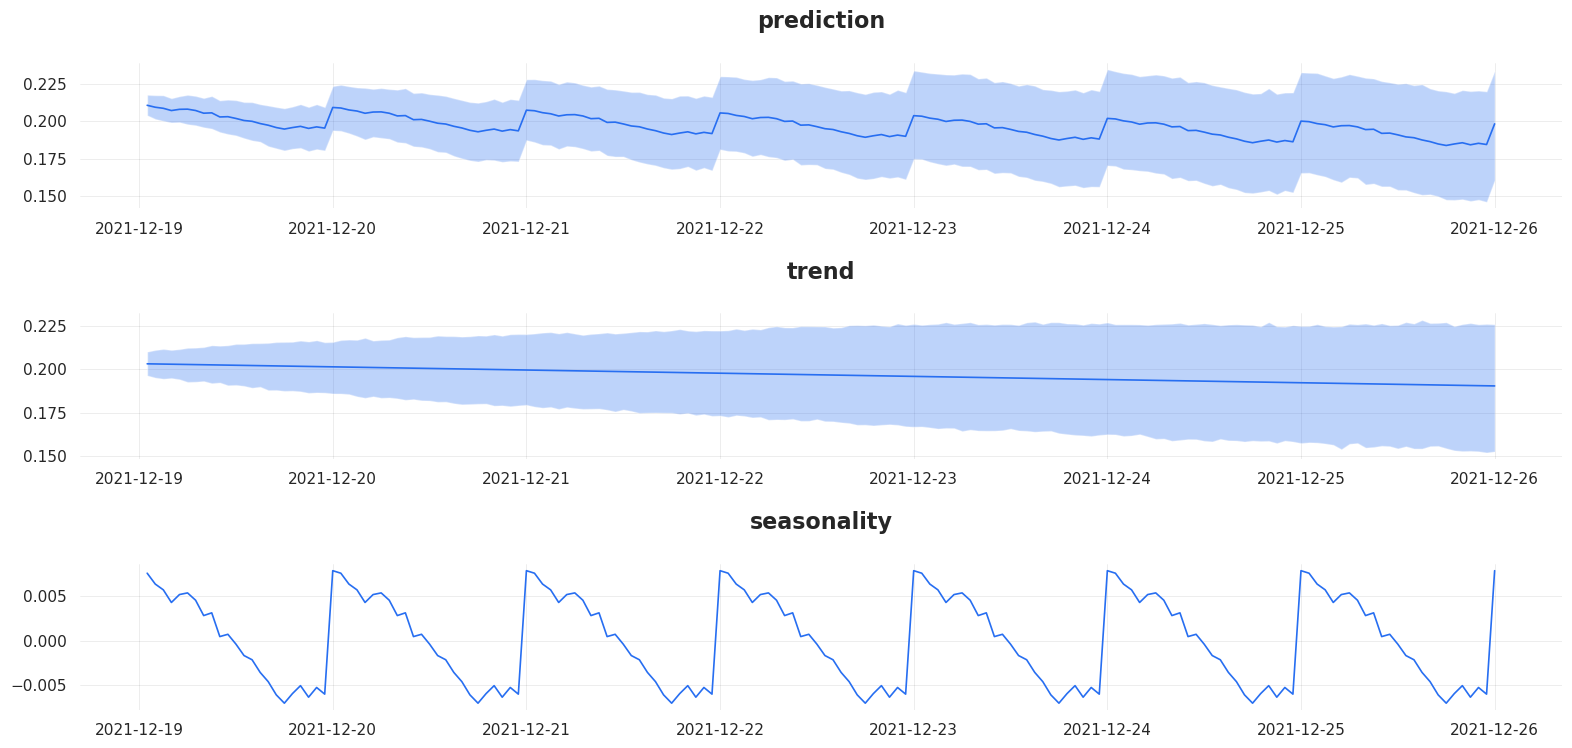

In [17]:
_ = plot_predicted_components(predicted_df, "hour_time", plot_components=['prediction', 'trend', 'seasonality'])

Обратите внимание, что доверительный интервал есть только у тренда, но его нет у сезонности! Это недостаток текущего алгоритма оценки (*Maximum A Posteriori, MAP*) - он очень быстрый, но не очень точный и часто недооценивает изменчивость в данных. Какая у нас альтернатива?

## Снова строим модель (MCMC)

Метод Markov Chain Monte Carlo (MCMC) - ровная противоположность MAP! Он оценивает доверительные интервалы для всего, и имеет гораздо больше теоретических гарантий точности - но при этом не самый шустрый. Попробуем оценить модель с помощью него:

In [18]:
dlt_mcmc = DLT(seasonality=24, response_col="CTR", date_col="hour_time", 
               estimator='stan-mcmc', #новый алгоритм оценки
               num_warmup=2000, #время "разогрева"
               num_sample=1000) #время сэмплирования

Запускаем:

In [19]:
dlt_mcmc.fit(activity)

INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 500 and samples(per chain): 250.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Дальше всё то же самое:

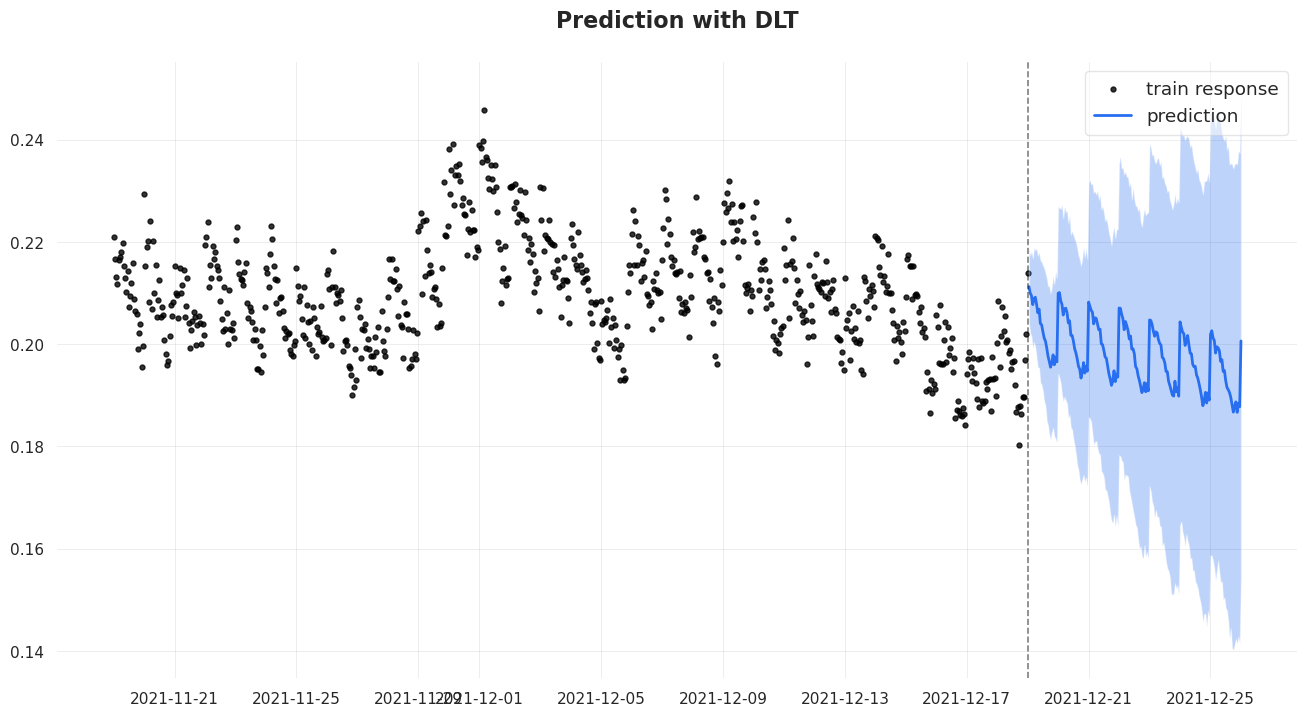

In [20]:
future_df = dlt_mcmc.make_future_df(periods=24*7)

predicted_df = dlt_mcmc.predict(df=future_df)

_ = plot_predicted_data(activity, predicted_df, "hour_time", 'CTR', title='Prediction with DLT')

Очень похоже! А если декомпозировать?

In [21]:
predicted_df = dlt_mcmc.predict(df=future_df, decompose=True)

predicted_df.head()

,hour_time,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95,regression_5,regression,regression_95
0,2021-12-19 01:00:00,0.203797,0.211195,0.218637,0.195872,0.203345,0.210852,0.006758,0.007839,0.008811,0.0,0.0,0.0
1,2021-12-19 02:00:00,0.202023,0.210064,0.217932,0.195227,0.203523,0.211358,0.005556,0.006620,0.007649,0.0,0.0,0.0
2,2021-12-19 03:00:00,0.201036,0.209581,0.217429,0.194940,0.203515,0.211477,0.004755,0.005994,0.007208,0.0,0.0,0.0
3,2021-12-19 04:00:00,0.198049,0.207620,0.217232,0.193731,0.203597,0.212914,0.003172,0.004151,0.005196,0.0,0.0,0.0
4,2021-12-19 05:00:00,0.198916,0.208424,0.218527,0.193553,0.203156,0.213539,0.004305,0.005240,0.006180,0.0,0.0,0.0


И нарисуем:

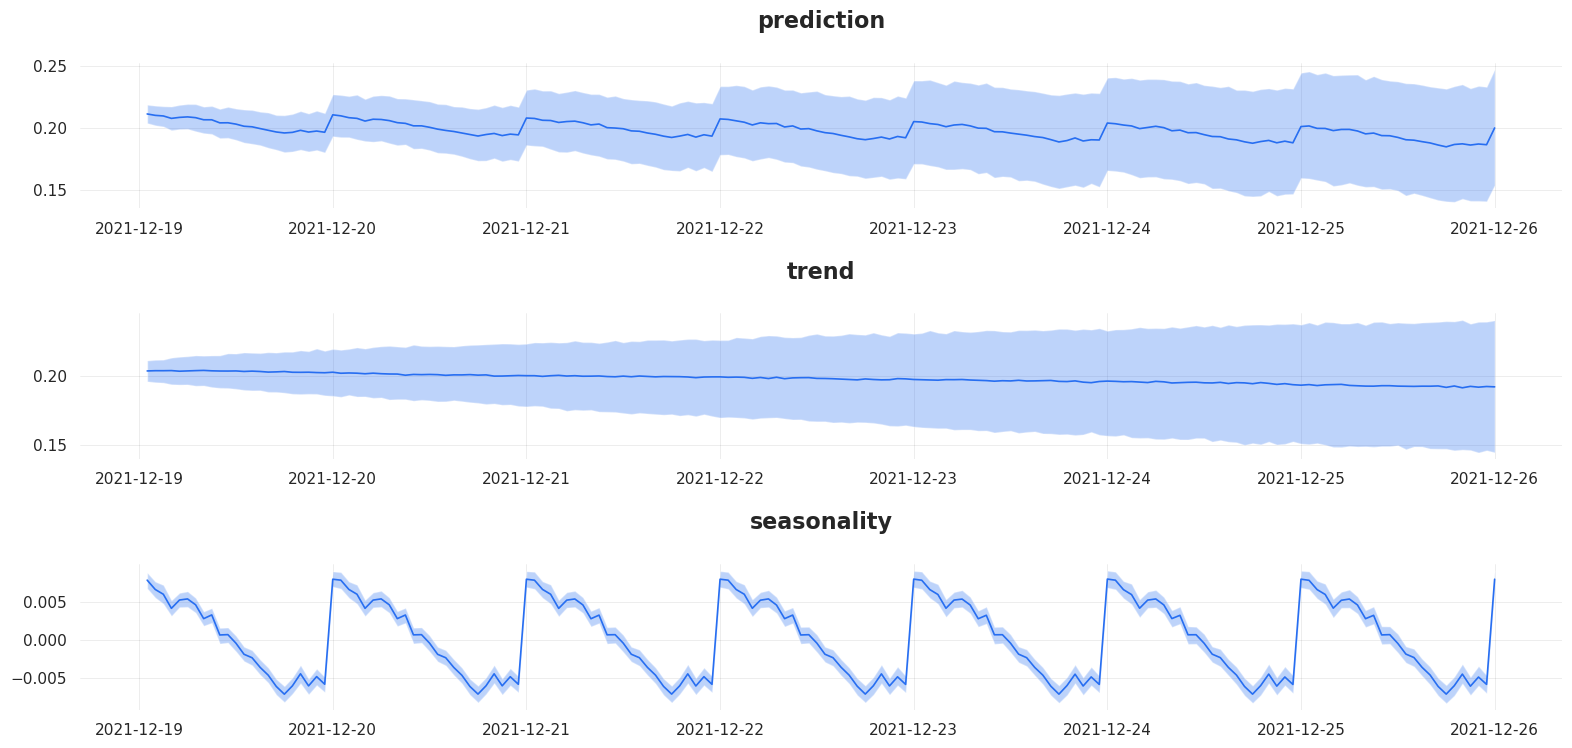

In [22]:
_ = plot_predicted_components(predicted_df, "hour_time", plot_components=['prediction', 'trend', 'seasonality'])

Можете видеть, что теперь у сезонности тоже есть доверительный интервал!

# Проверка качества моделей

Мы построили нашу первую модель! Однако нас может мучить вопрос: а насколько эта модель хороша? Насколько сильные ошибки стоит для неё ожидать?

Вы можете знать, что в машинном обучении это решают тремя основными способами:

* Разделением на *тренировочную* (трейн, train) и *тестовую* (тест, test) выборки - на первой мы модель обучаем, на второй проверяем, насколько хорошо она предсказывается
* *Кроссвалидацией* - как прошлый метод, только выборка дробится на трейн и тест несколькими способами
* Комбинация двух выше - выделяем тест, на трейне делаем кроссвалидацию, а потом дополнительно ещё проверяем модель на тесте

Однако в классической версии эти подходы не работают для временных рядов - так как наблюдения у нас не независимые, а связанные между собой временем! Приходится это учитывать - и в Orbit это реализовано через концепцию **бэктестинга**. Как это работает - мы сейчас увидим!

In [23]:
from orbit.diagnostics.backtest import BackTester #основной класс для бэктестинга 
from orbit.utils.params_tuning import grid_search_orbit #для подбора оптимальных параметров

Реализован бэктестинг в Orbit в двух разных вариантах - **расширяющееся (expanding)** и **скользящее (rolling) окно**. Давайте посмотрим, в чём разница между ними:

In [24]:
#expanding

bt_exp = BackTester(
    model=dlt, #наша моделька
    df=activity, #датафрейм для обучения
    min_train_len=24*7, #самый маленький кусочек данных, с которого начинается обучение
    incremental_len=24, #на сколько происходит прирост тренировочных данных
    forecast_len=24, #горизонт пронозирования
    window_type="expanding" #тип окошка
)

Расширяющееся окно начинает с небольшого размера тренировочных данных и постепенно его увеличивает, пока не кончатся данные. Так можно оценить, как меняется точность предсказания с наращиванием количества информации. Такой вариант окна лучше всего подходит, если данные не слишком волатильны и в далеком прошлом есть важная информация, полезная для предсказания в будущем:

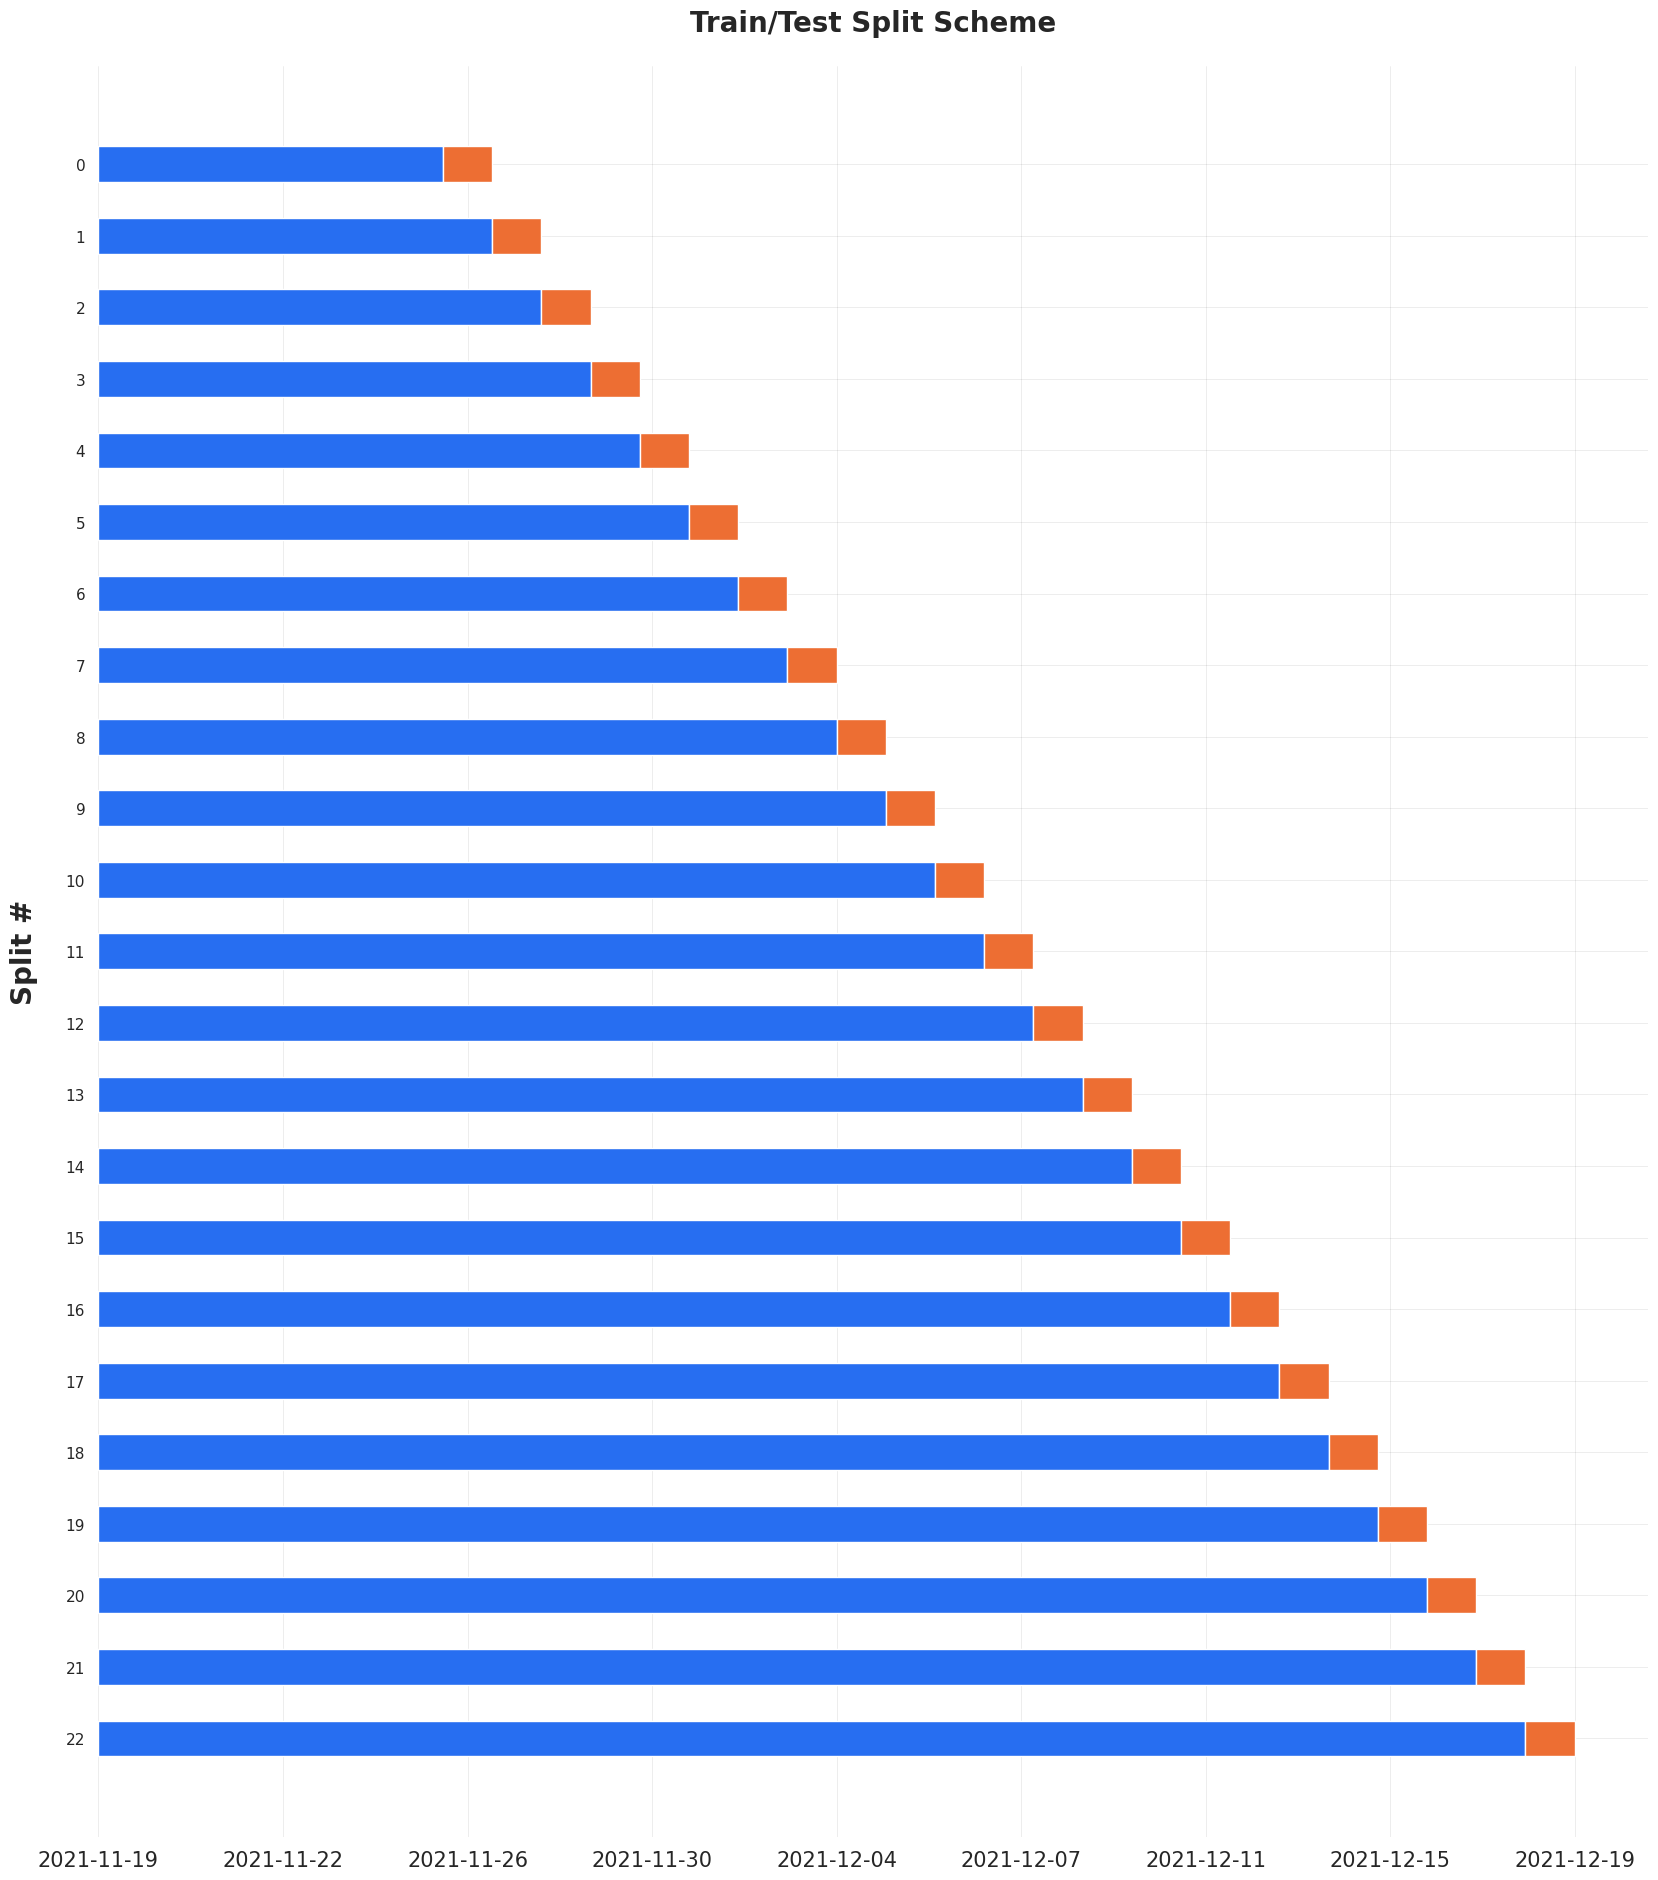

In [25]:
bt_exp.plot_scheme()

In [26]:
#rolling

bt_roll = BackTester(
    model=dlt,
    df=activity,
    min_train_len=24*7,
    incremental_len=24,
    forecast_len=24,
    window_type="rolling",
)

В скользящем размер тренировочных данных не меняется - он сдвигается во времени. Такой вариант полезен, если наши данные волатильны и основная информация о предсказании находится в ближайшем прошлом:

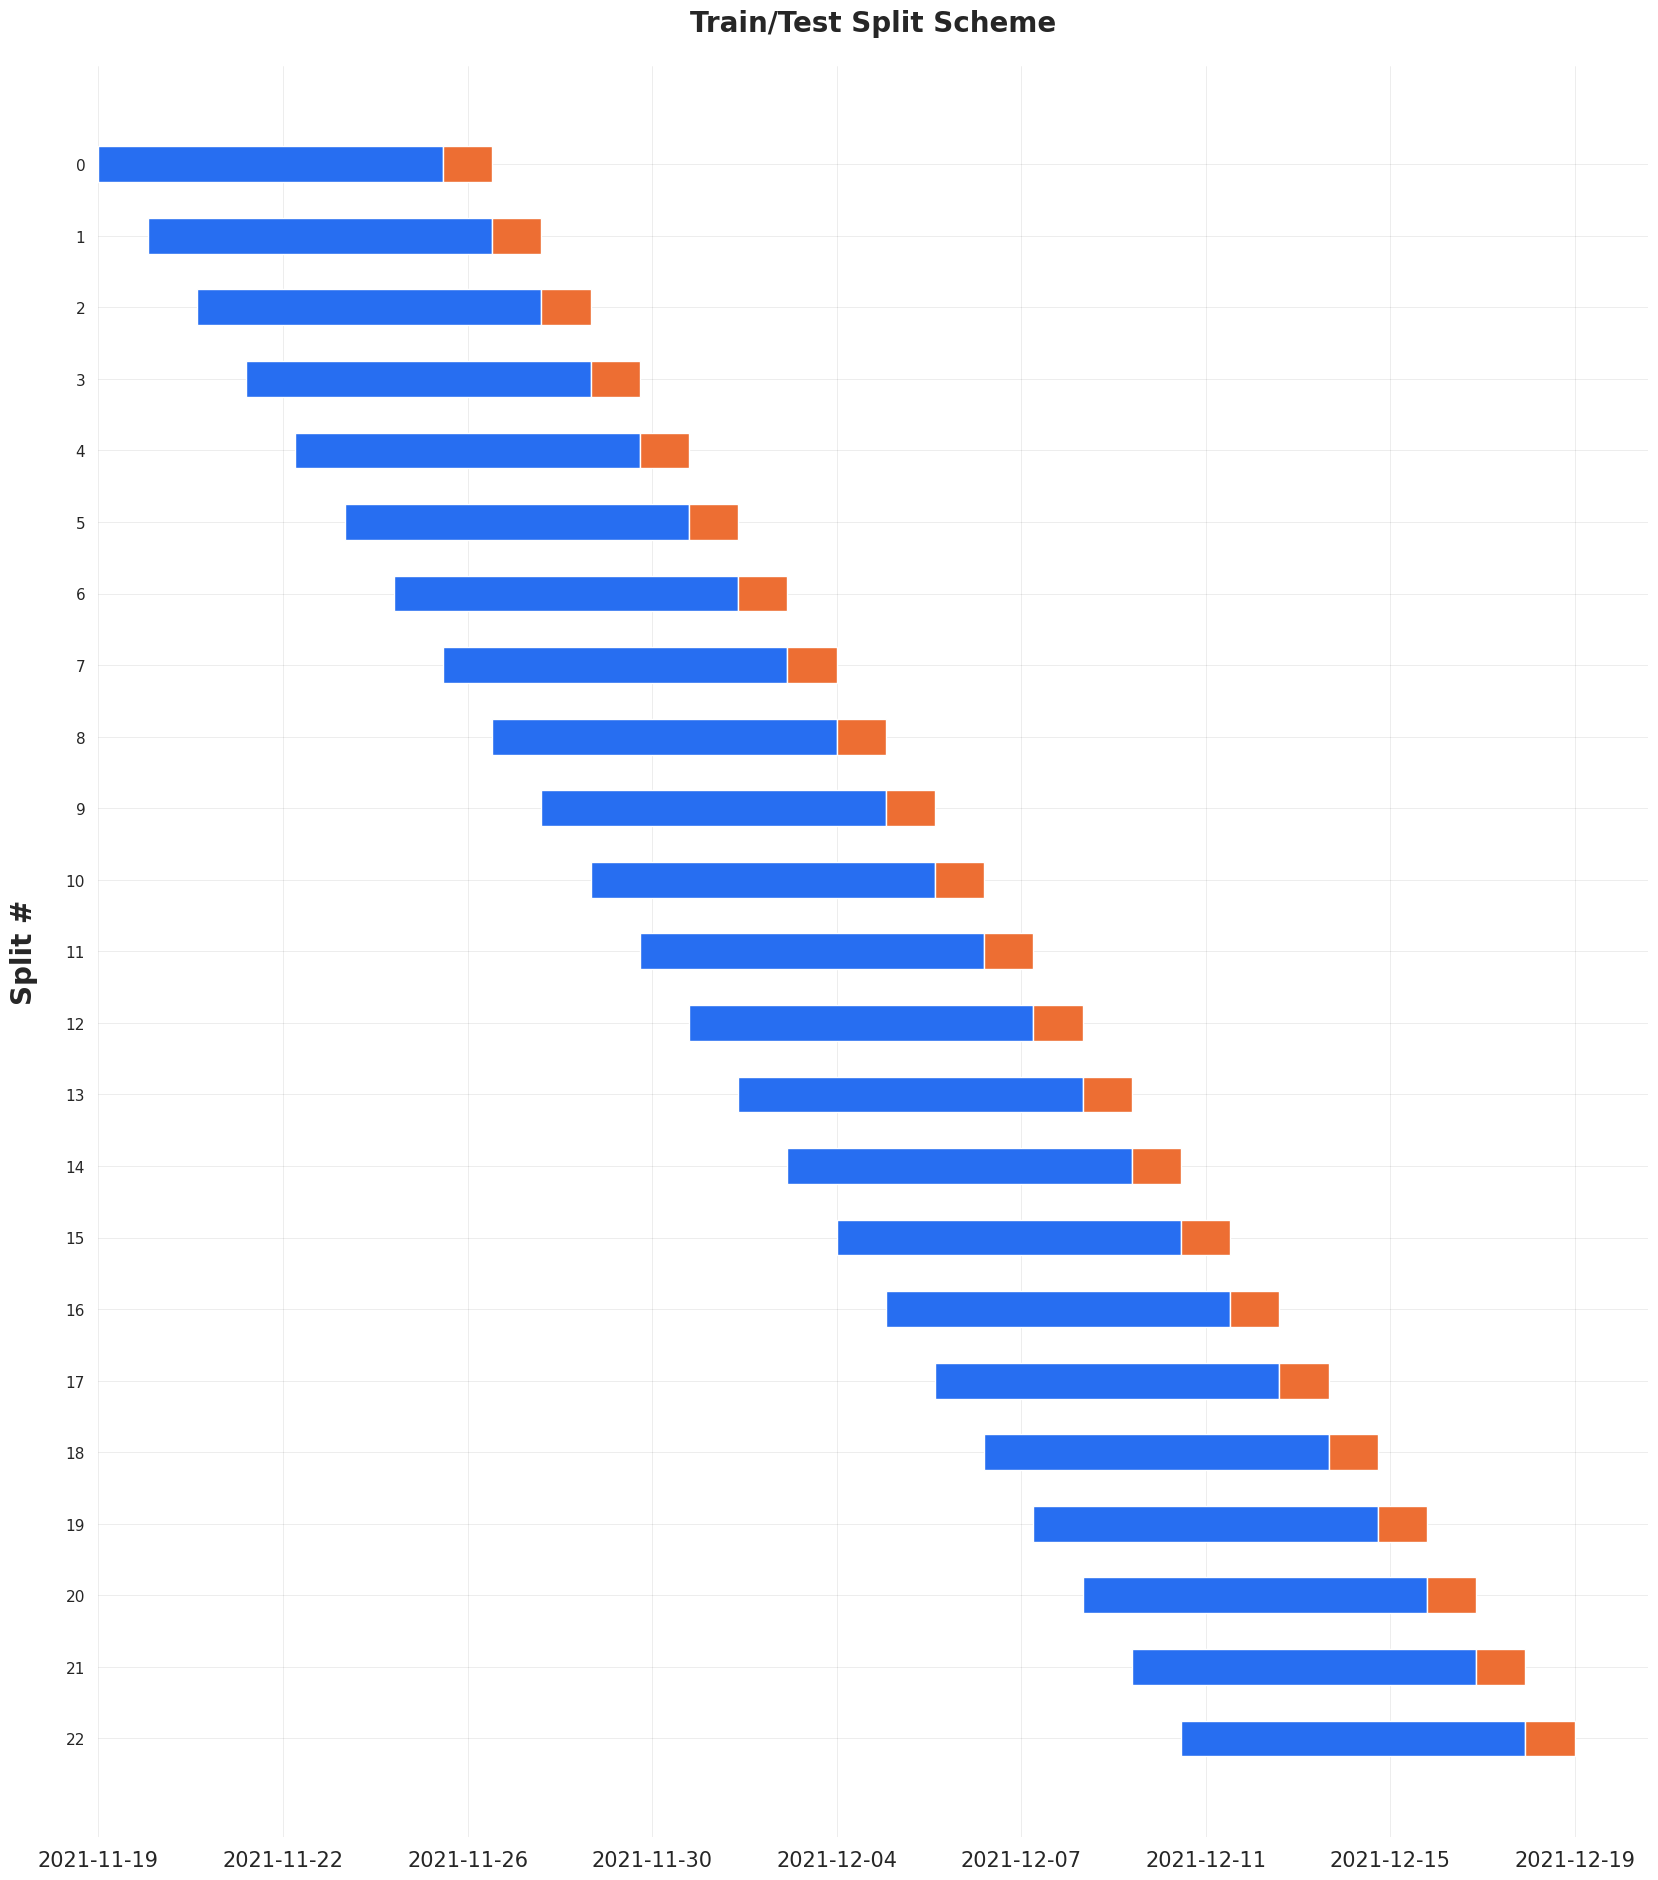

In [27]:
bt_roll.plot_scheme()

Давайте для примера посмотрим, что нам покажет расширяющееся окно:

In [28]:
bt_exp.fit_predict() #обучаем
bt_exp.score() #выводим метрики

,metric_name,metric_values,is_training_metric
0,smape,0.022798,False
1,wmape,0.022697,False
2,mape,0.022705,False
3,mse,0.000039,False
4,mae,0.004761,False
5,rmsse,1.072751,False


Судя по всему, по нашим метрикам эта модель справляется неплохо! Но это ещё не всё: мы можем так подбирать **оптимальные параметры** для нашей модели! Делается это через grid search - перебор возможных параметров модели и проверка, какой из них выдаёт минимальное значение функционала ошибки.

Давайте, например, сделаем это для параметра угасания тренда:

In [29]:
best_params, tuned_df = grid_search_orbit(param_grid={"damped_factor": np.arange(0.1, 1.0, 0.1)}, #наш параметр
                                        model=dlt,
                                        df=activity,
                                        min_train_len=24*7,
                                        incremental_len=24,
                                        forecast_len=24,
                                        metrics=None, #смотрим smape по умолчанию
                                        criteria="min", #говорим, что нам нужна минимизация
                                        verbose=True) #пусть печатает процесс выполнения

  0%|          | 0/9 [00:00<?, ?it/s]

INFO:orbit:tuning hyper-params {'damped_factor': 0.1}
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:tuning metric:0.022772
INFO:orbit:tuning hyper-params {'damped_factor': 0.2}
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:tuning metric:0.022745
INFO:orbit:tuning hyper-params {'damped_factor': 0.30000000000000004}
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:tuning metric:0.022695
INFO:orbit:tuning hyper-params {'damped_factor': 0.4}
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:tuning metric:0.02266
INFO:orbit:tuning hyper-params {'damped_factor': 0.5}
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:tuning metric:0.022712
INFO:orbit:tuning hyper-params {'damped_factor': 0.6}
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:tuning metric:0.022755
INFO:orbit:tuning hyper-params {'damped_factor': 0.7000000000000001}
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit

Давайте глянем на лучшие параметры модели, а также полный список всех вариантов:

In [30]:
best_params

[{'damped_factor': 0.7000000000000001}]

In [31]:
tuned_df #не так уж сильно и различаются варианты

,damped_factor,metrics
0,0.1,0.022772
1,0.2,0.022745
2,0.3,0.022695
3,0.4,0.022660
4,0.5,0.022712
5,0.6,0.022755
6,0.7,0.022647
7,0.8,0.022711
8,0.9,0.022731


## Дополнительно: проверка MCMC

Хотя MCMC и является более точным методам, он также более требователен к настройке параметров и соблюдению допущений. Им можно проверять графически для разных параметров - главное смотреть на глобальные показатели!

In [32]:
params = dlt_mcmc.get_posterior_samples(permute=False) #достаём информацию о параметрах

params.keys() #их названия - можно залезть в оригинальный код на Stan, чтобы вычислить их значение

odict_keys(['l', 'b', 'lev_sm', 'slp_sm', 'obs_sigma', 'nu', 'lt_sum', 's', 'sea_sm', 'gt_sum', 'gb', 'gl'])

In [33]:
params["obs_sigma"].shape #лучше смотреть те, у которых третьего измерения либо нет, либо оно равно 1

(4, 250)

Есть очень много разных вариантов проверок, реализованных в библиотеке [Arviz](https://python.arviz.org/en/latest/). Есть очень много разных интересных диагностик, но самая важная их них - *сходимость цепей*. Визуально она должна выглядеть как 4 временных ряда, скачущих вокург примерно одного значения. Это значит, что разные инстанции алгоритма пришли к одному и тому же выводу в плане параметров!

array([[<AxesSubplot: title={'center': 'obs_sigma'}>,
        <AxesSubplot: title={'center': 'obs_sigma'}>]], dtype=object)

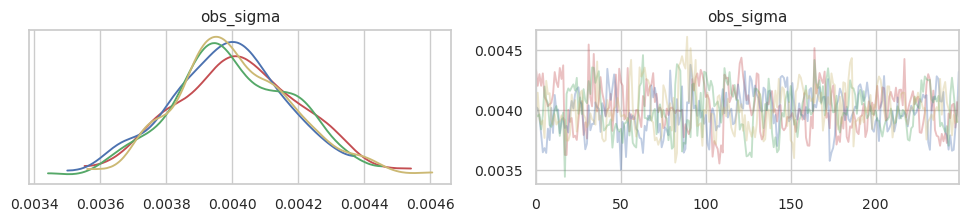

In [34]:
az.plot_trace(params, chain_prop={"color": ['r', 'b', 'g', 'y']}, var_names = "obs_sigma")

# Регрессоры в моделях

Во временных рядах информация необязательно должна браться из прошлых значений показателя. Мы можем брать другие временные ряды и оценивать их взаимосвязь с нашим - вдруг они хорошо его предсказывают! Такие временные ряды называются **регрессорами**.

Впрочем, есть одно но. Если мы хотим предсказывать что-то вместе с регрессорами, мы должны знать будущие значения этих регрессоров - иначе ничего не заработает! Как можно подойти к этой проблеме?

* Ориентироваться на фиксированные ежегодные события - например, праздники!
* Пытаться предсказать самостоятельно другой временной ряд либо взять какие-то официальные прогнозы, если это какой-то невнутренний показатель.
* Сценарное пронозирование - "что мы можем ожидать, если переменные поведут себя вот так?". В целом предыдущий вариант вполне можно оформить именно так, но можно подбирать значения хоть вручную.

Давайте попробуем взять количество просматриваемых постов в каждый час! Вряд ли мы будем знать это заранее, но в рамках демонстрации принципа должно быть неплохо.

In [35]:
query = '''
SELECT 
    toStartOfHour(time) hour_time,
    uniqExact(post_id) num_posts
FROM 
    simulator.feed_actions_all
WHERE hour_time >= toDateTime('2021-11-19 00:00:00')
  AND hour_time <= toDateTime('2021-12-19 00:00:00')
GROUP BY hour_time
ORDER BY 
    hour_time
'''

posts = ph.read_clickhouse(query=query, connection=connection)
posts.head()

,hour_time,num_posts
0,2021-11-19 00:00:00,131
1,2021-11-19 01:00:00,131
2,2021-11-19 02:00:00,126
3,2021-11-19 03:00:00,125
4,2021-11-19 04:00:00,119


<AxesSubplot: xlabel='hour_time', ylabel='num_posts'>

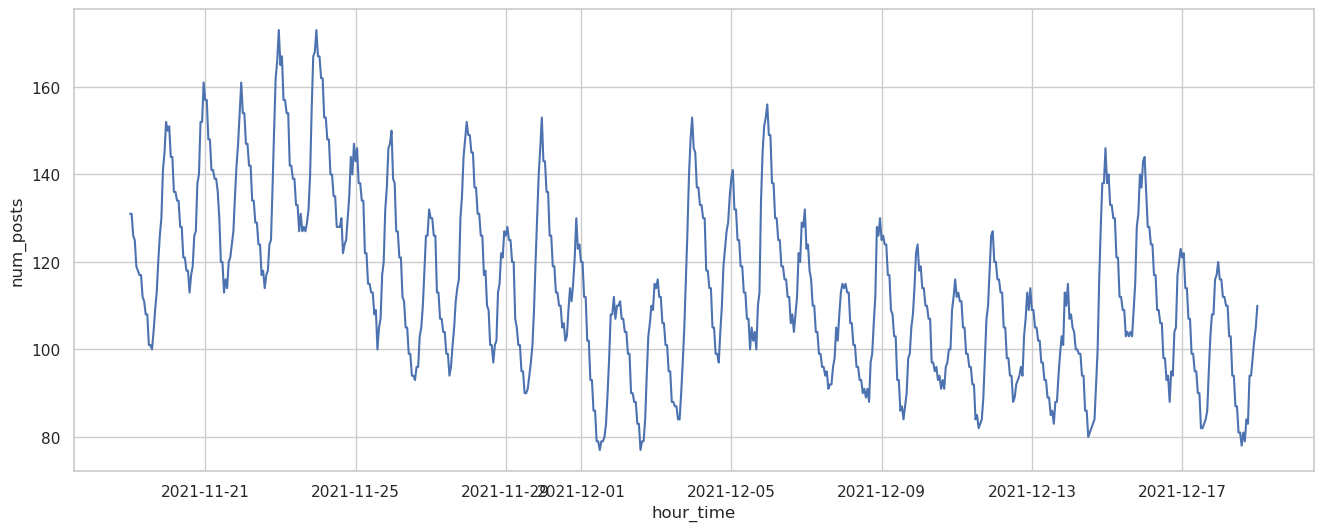

In [36]:
#как меняется число постов
sns.lineplot(x="hour_time", y="num_posts", data=posts)

In [37]:
#делаем общий датафрейм
data_reg = activity.merge(posts)
data_reg

,hour_time,CTR,num_posts
0,2021-11-19 00:00:00,0.220865,131
1,2021-11-19 01:00:00,0.216720,131
2,2021-11-19 02:00:00,0.213163,126
3,2021-11-19 03:00:00,0.211687,125
4,2021-11-19 04:00:00,0.216482,119
...,...,...,...
716,2021-12-18 20:00:00,0.189591,94
717,2021-12-18 21:00:00,0.189650,98
718,2021-12-18 22:00:00,0.196809,102
719,2021-12-18 23:00:00,0.201963,105


Можем даже сразу глянуть на корреляцию между ними:

In [38]:
data_reg.drop("hour_time", axis=1).corr() #по Пирсону не шибко большая

,CTR,num_posts
CTR,1.000000,0.049822
num_posts,0.049822,1.000000


In [39]:
data_reg.drop("hour_time", axis=1).corr(method="spearman") #да и Спирмен не лучше

,CTR,num_posts
CTR,1.000000,0.052275
num_posts,0.052275,1.000000


Давайте посмотрим, как это будет выглядеть в модели. Реально лучше строить их через MCMC, но здесь для скорости используем MAP:

In [40]:
train_dat = data_reg.query("hour_time < '2021-12-10 00:00:00'") #возьмём часть данных для обучения
test_dat = data_reg.query("hour_time >= '2021-12-10 00:00:00'").astype({"num_posts":"int64"}) #а это будем предсказывать - важно сконвертировать в инт

In [41]:
reg_model = DLT(response_col="CTR",
                date_col="hour_time", 
                seasonality=24,
                estimator="stan-map", 
                n_bootstrap_draws=1000, 
                regressor_col=["num_posts"] #наша колонка с регрессором! Должна быть списком
               ) 

reg_model.fit(train_dat)

INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


Дальше всё то же самое:

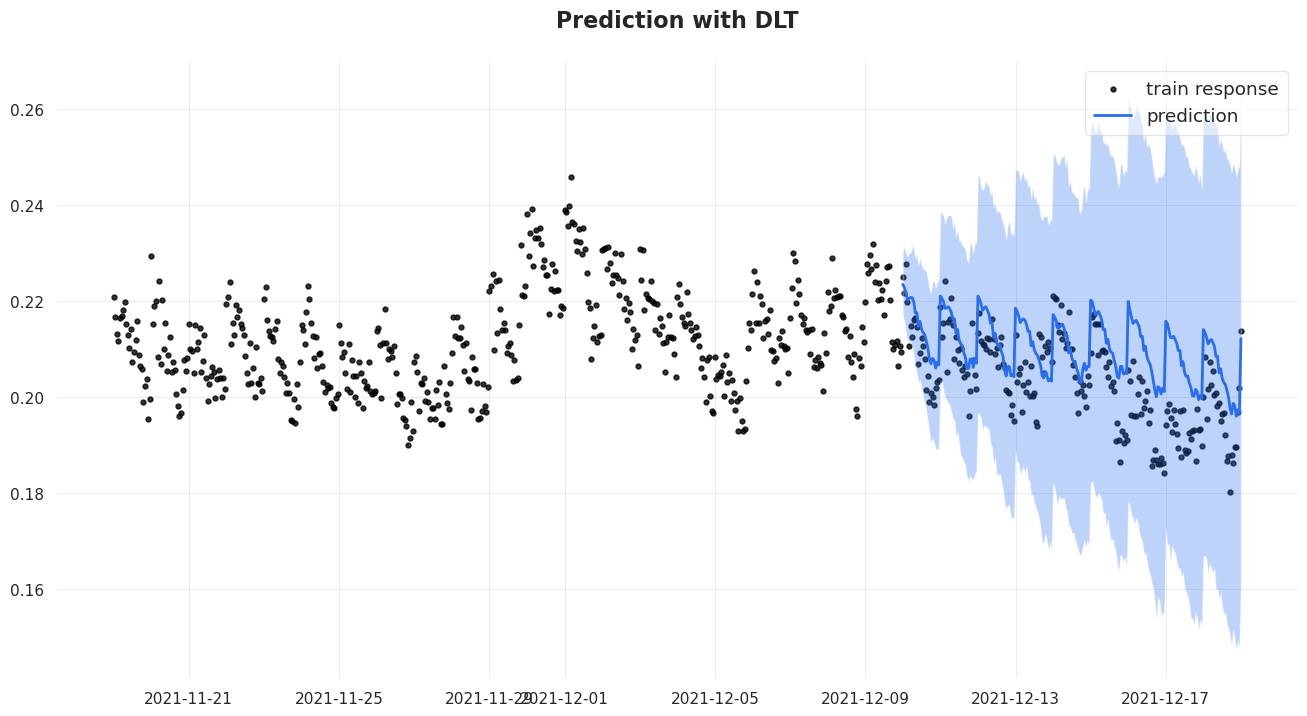

In [49]:
predicted_df_reg = reg_model.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df_reg, "hour_time", 'CTR', title='Prediction with DLT') #так себе

И декомпозируем:

In [43]:
predicted_df = reg_model.predict(df=test_dat, decompose=True)

predicted_df.head()

,hour_time,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95,regression_5,regression,regression_95
0,2021-12-10 00:00:00,0.215806,0.223444,0.230337,0.194169,0.201806,0.208700,0.006031,0.006031,0.006031,0.015607,0.015607,0.015607
1,2021-12-10 01:00:00,0.215322,0.222837,0.230385,0.194136,0.201651,0.209199,0.005447,0.005447,0.005447,0.015739,0.015739,0.015739
2,2021-12-10 02:00:00,0.213932,0.221665,0.229360,0.193786,0.201519,0.209214,0.005068,0.005068,0.005068,0.015078,0.015078,0.015078
3,2021-12-10 03:00:00,0.211244,0.220197,0.228846,0.192450,0.201404,0.210053,0.003715,0.003715,0.003715,0.015078,0.015078,0.015078
4,2021-12-10 04:00:00,0.211514,0.220485,0.229894,0.192332,0.201303,0.210712,0.004634,0.004634,0.004634,0.014549,0.014549,0.014549


И нарисуем:

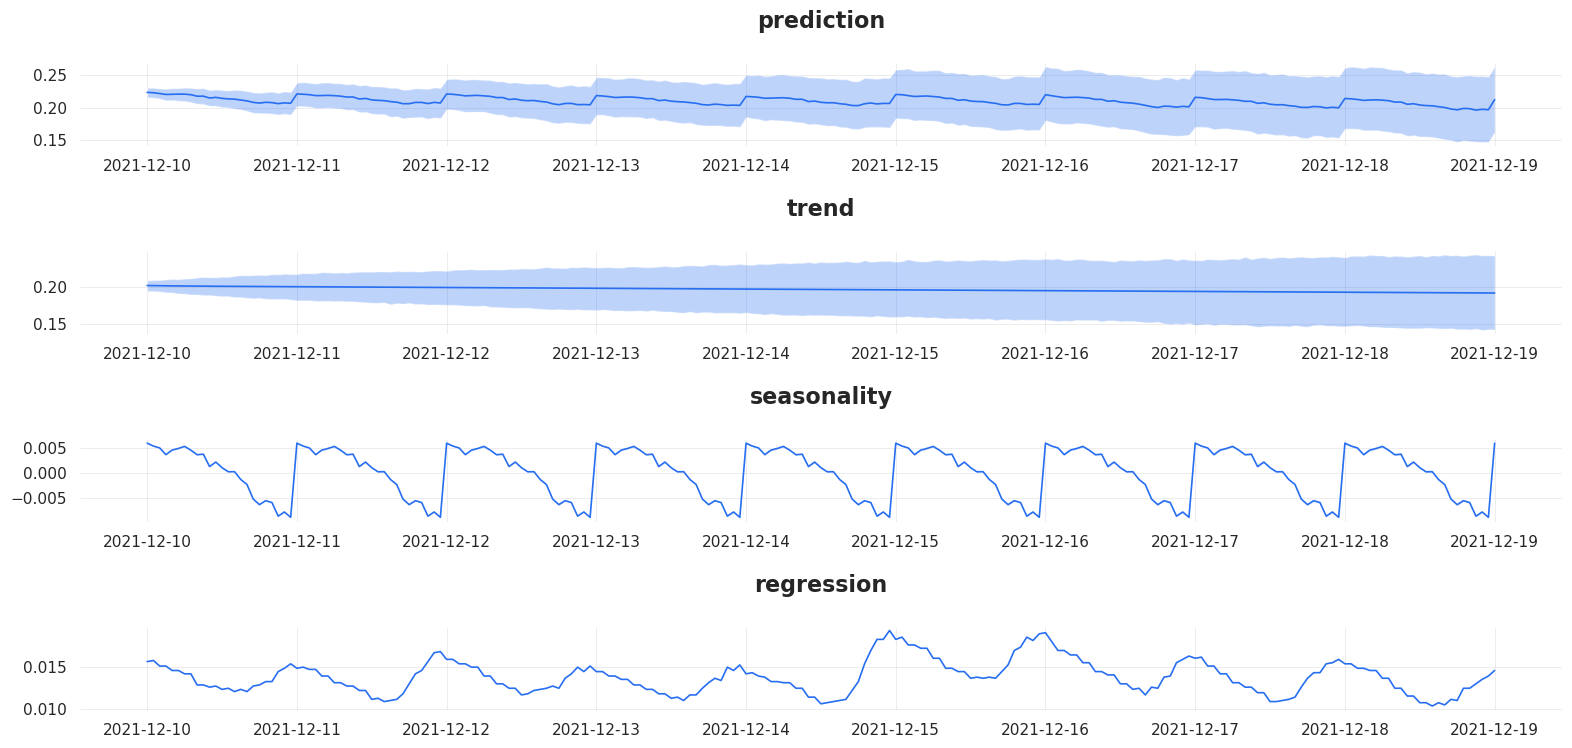

In [44]:
_ = plot_predicted_components(predicted_df, "hour_time", plot_components=['prediction', 'trend', 'seasonality', "regression"])

Взглянем на коэффициент регрессии:

In [45]:
reg_model.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,num_posts,Regular,0.000132


## Априорные распределения

Если у нас есть какие-то предварительные убеждения о том, в какую сторону должен быть направлен регрессор, какое его наиболее вероятное значение, насколько мы в этом значении уверены - это можно включить в модель как дополнительный источник информации!

In [46]:
reg_model_prior = DLT(response_col="CTR",
                date_col="hour_time", 
                seasonality=24,
                estimator="stan-map", 
                n_bootstrap_draws=1000, 
                regressor_col=["num_posts"], 
                regressor_sign=["+"], #допустим, мы считаем, что связь обязательно положительная
                regressor_beta_prior=[0.3], #пусть мы думаем, что истинное значение коэффициента - вот такое
                regressor_sigma_prior=[0.1] #и зададим уровень уверенности
               ) 

reg_model_prior.fit(train_dat)

INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


<AxesSubplot: ylabel='Count'>

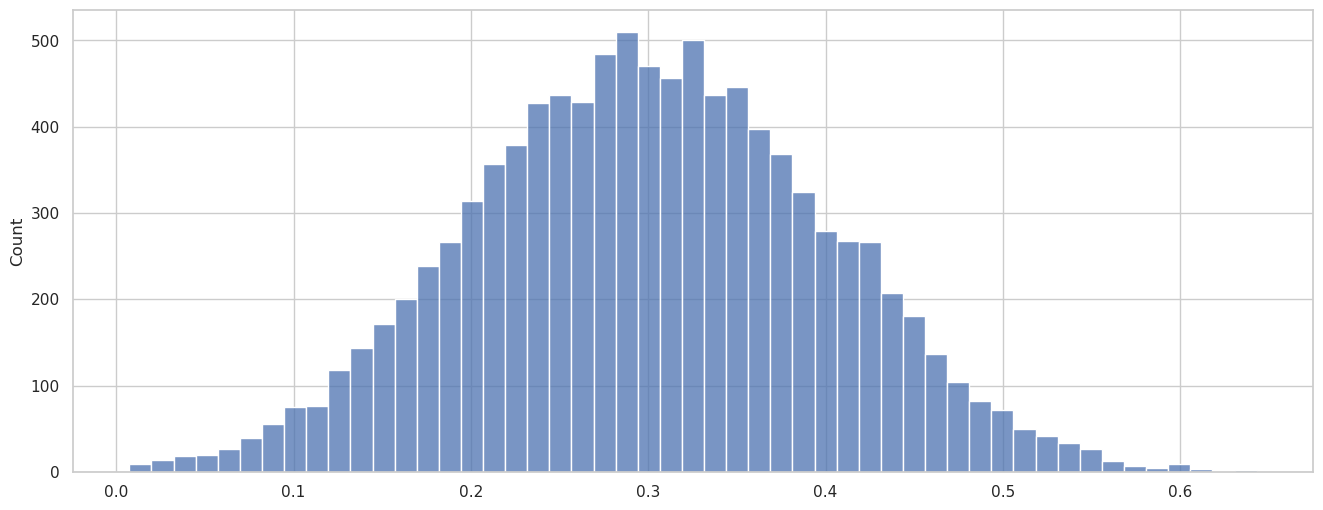

In [47]:
#чтобы вы поняли, что именно мы тут задали

dist = np.random.normal(0.3, 0.1, size=10000) #это вот такое нормальное распределение
dist = dist[dist >= 0.0] #но только значения больше нуля

sns.histplot(x=dist) #truncated normal distribution

Предиктим:

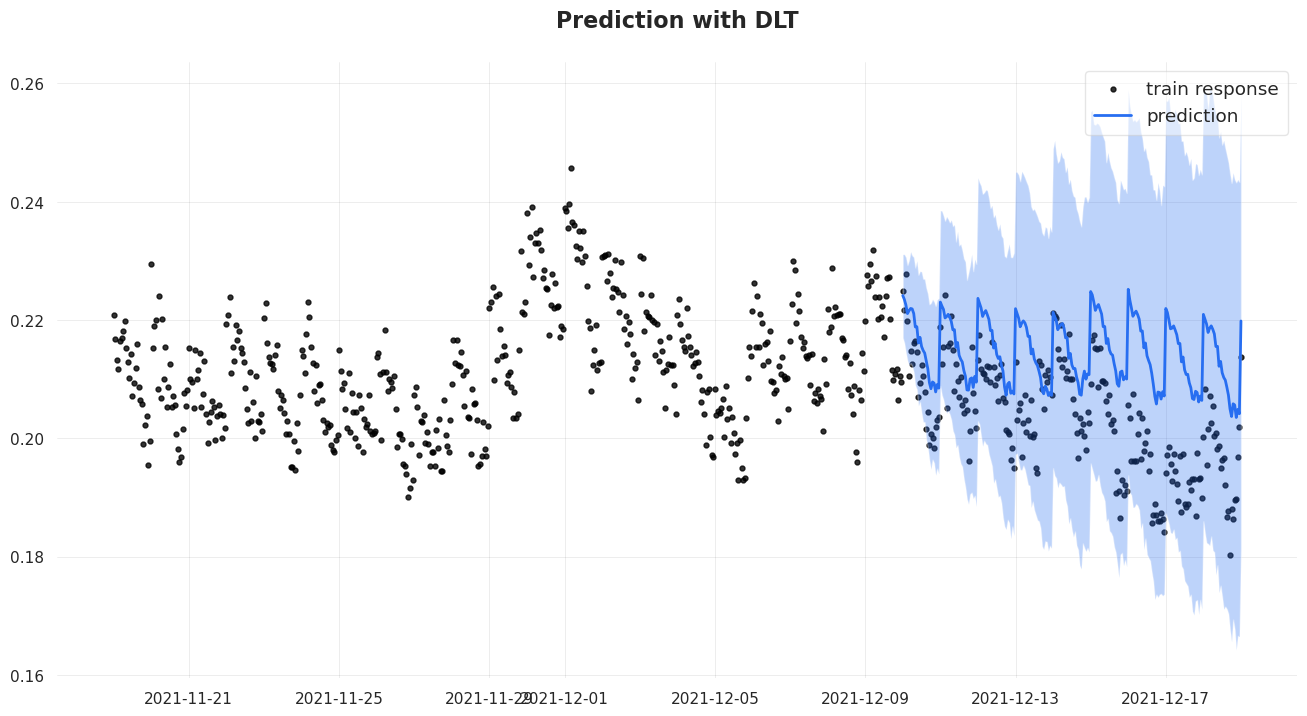

In [50]:
predicted_df_prior = reg_model_prior.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df_prior, "hour_time", 'CTR', title='Prediction with DLT') #кажется, стало хуже

Сравним коэффициенты:

In [51]:
print(f"Модель с неинформативным априорным распределением: {reg_model.get_regression_coefs()['coefficient'][0]}")
print(f"Модель с информативным априорным распределением: {reg_model_prior.get_regression_coefs()['coefficient'][0]}")

Модель с неинформативным априорным распределением: 0.00013226292060554702
Модель с информативным априорным распределением: 0.00012520942695527275


## Регуляризация

Очень часто, чтобы решить проблемы с переобучением, ML-специалисты прибегают к технике **регуляризации** - дополнительных штрафов к коэффициентам модели, чтобы они не становились слишком большими, особенно если регрессор плохой. В целом задавание априорных распределений выполняет в том числе эту задачу - но мы можем задать немного другие опции регуляризации!

По умолчанию оно стоит как `fixed_ridge`. Давайте зададим `auto_ridge` - эта опция адаптивно подбирает оптимальную степень регуляризации на основе данных.

In [52]:
reg_model_auto = DLT(response_col="CTR",
                date_col="hour_time", 
                seasonality=24,
                estimator="stan-map", 
                n_bootstrap_draws=1000, 
                regressor_col=["num_posts"], 
                regression_penalty="auto_ridge" #наш новый параметр
               ) 

reg_model_auto.fit(train_dat)

INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


Предиктим:

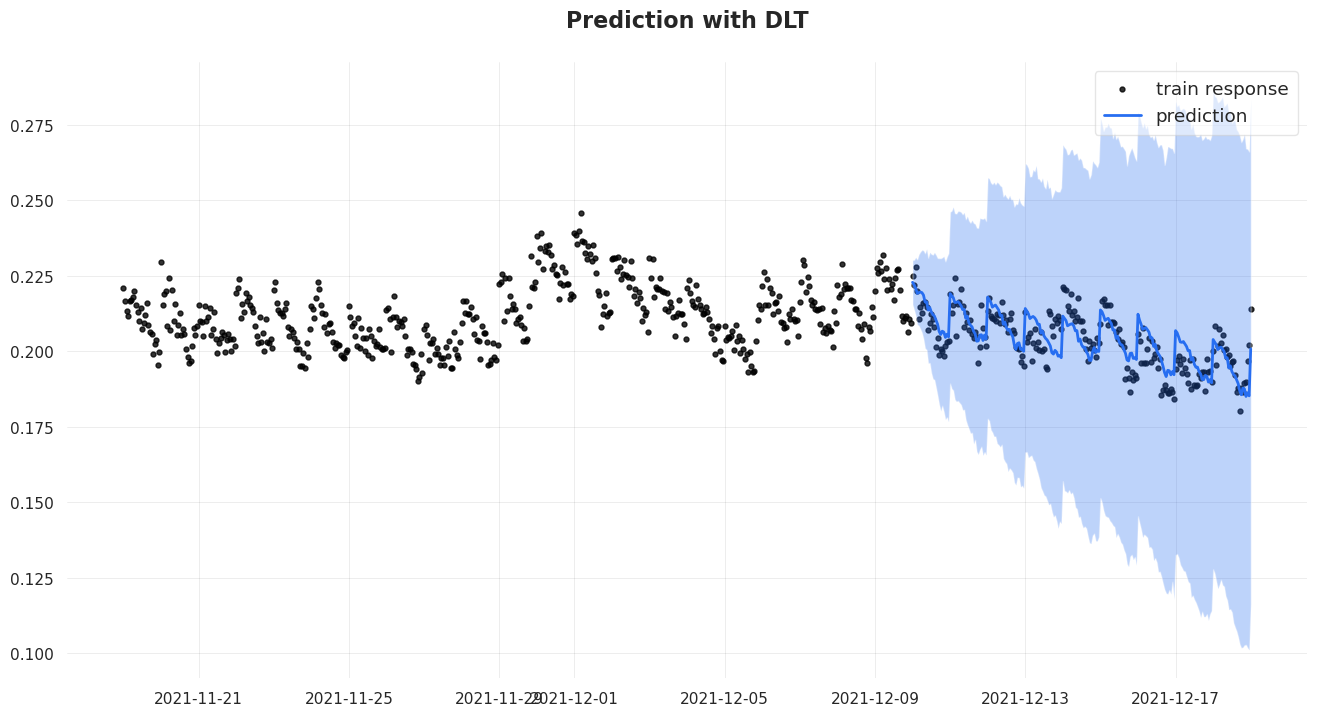

In [53]:
predicted_df_auto = reg_model_auto.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df_auto, "hour_time", 'CTR', title='Prediction with DLT') 

In [54]:
reg_model_auto.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,num_posts,Regular,0.000139


Также сделаем `lasso` - оно обычно "зануляет" плохие регрессоры:

In [55]:
reg_model_lasso = DLT(response_col="CTR",
                date_col="hour_time", 
                seasonality=24,
                estimator="stan-map", 
                n_bootstrap_draws=1000, 
                regressor_col=["num_posts"], 
                regression_penalty="lasso"
               ) 

reg_model_lasso.fit(train_dat)

INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


Предиктим:

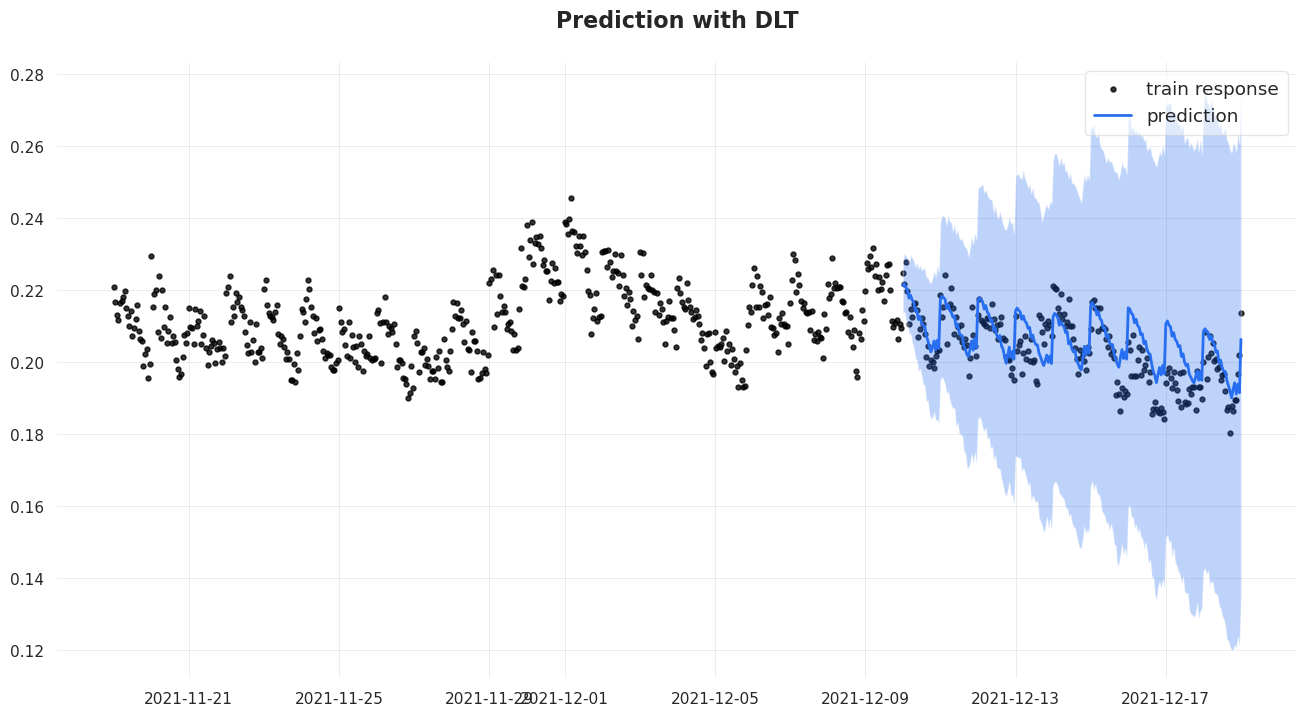

In [56]:
predicted_df_lasso = reg_model_lasso.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df_lasso, "hour_time", 'CTR', title='Prediction with DLT') #кажется, стало хуже

In [57]:
reg_model_lasso.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,num_posts,Regular,0.00014


## Информационные критерии

Если вы когда-нибудь работали с регрессионными моделями, то могли видеть аббревиатуры AIC/BIC. Это так называемые [информационные критерии](https://docs.displayr.com/wiki/Information_Criteria#:~:text=An%20information%20criterion%20is%20a,the%20complexity%20of%20the%20model.) - мера относительного качества модели. Их задача - отобрать модель с максимальной предсказательной способностью и минимумом предикторов.

Мы можем использовать их, чтобы выбрать лучшую модель!

In [58]:
#для полноты обучим модель без регрессора, но на тех же данных

no_reg_model = DLT(response_col="CTR",
                date_col="hour_time", 
                seasonality=24,
                estimator="stan-map", 
                n_bootstrap_draws=1000
               ) 

no_reg_model.fit(train_dat)

INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


Предиктим:

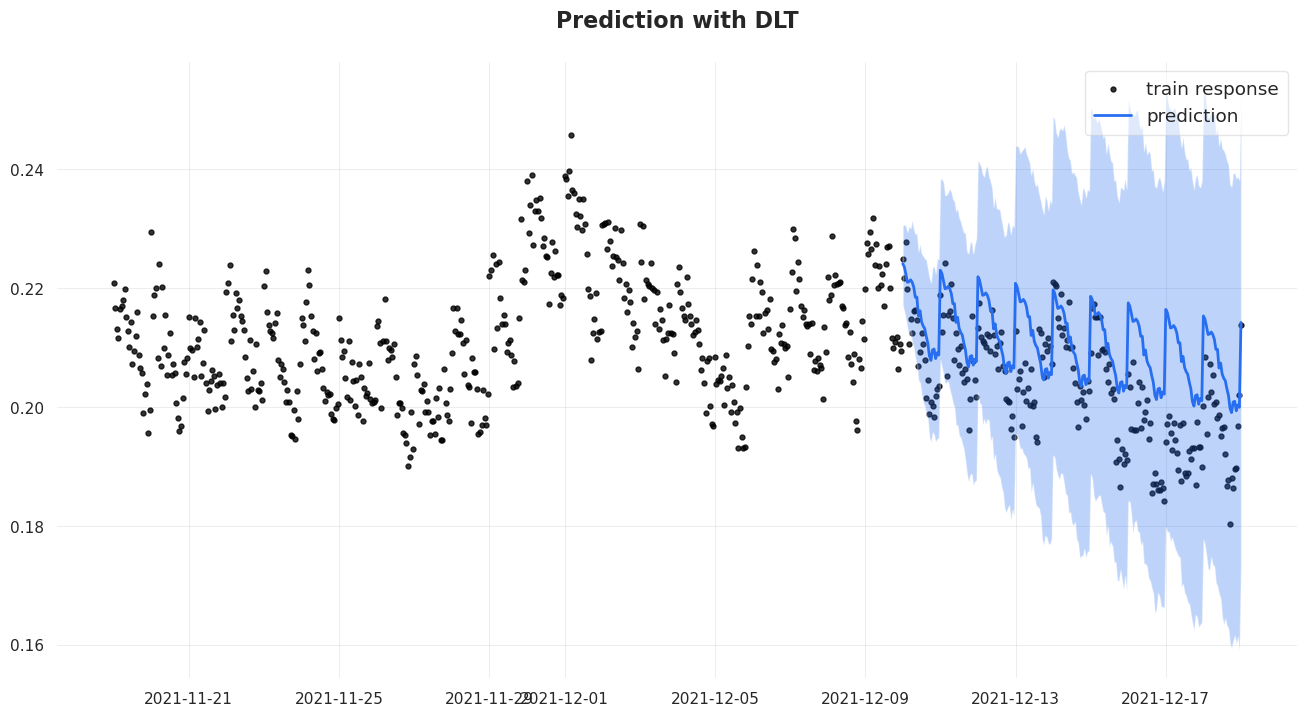

In [59]:
predicted_df = no_reg_model.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df, "hour_time", 'CTR', title='Prediction with DLT') 

Извлекаем BIC-и!

In [60]:
print(f"Без регрессора: {no_reg_model.get_bic()}")
print(f"С регрессором: {reg_model.get_bic()}")
print(f"С информативным распределением: {reg_model_prior.get_bic()}")
print(f"С auto-ridge: {reg_model_auto.get_bic()}")
print(f"С lasso: {reg_model_lasso.get_bic()}")

Без регрессора: -3981.1589659558167
С регрессором: -3971.1776325306932
С информативным распределением: -3979.7110669222975
С auto-ridge: -3943.5180761987976
С lasso: -3924.8381299160633


Самый низкий BIC у той модели, у которой этого регрессора вообще нет. По всей видимости, он не нужен!

Давайте сравним с выводами на тесте через метрику RMSSE:

In [61]:
from orbit.diagnostics.metrics import rmsse

In [62]:
print(f"Без регрессора: {rmsse(test_dat.CTR.values, predicted_df.prediction.values, train_dat.CTR.values)}")
print(f"С регрессором: {rmsse(test_dat.CTR.values, predicted_df_reg.prediction.values, train_dat.CTR.values)}")
print(f"С информативным распределением: {rmsse(test_dat.CTR.values, predicted_df_prior.prediction.values, train_dat.CTR.values)}")
print(f"С auto-ridge: {rmsse(test_dat.CTR.values, predicted_df_auto.prediction.values, train_dat.CTR.values)}")
print(f"С lasso: {rmsse(test_dat.CTR.values, predicted_df_lasso.prediction.values, train_dat.CTR.values)}")

Без регрессора: 1.7816118449603284
С регрессором: 1.7035630722801318
С информативным распределением: 2.4017187052956483
С auto-ridge: 1.068150048295326
С lasso: 1.2397537156453673


Что интересно, здесь вывод скорее в пользу auto-ridge! Но вопрос в том, будет ли auto-ridge так же хорошо генерализовываться дальше - к тому же здесь мы не учитываем совершенно дикие доверительные интервалы.

## А имело ли это смысл?

Вопрос любопытный. И возможно, нам в нём поможет каузальная диаграмма:

In [63]:
import graphviz #чтобы рисовать графы - нужен установленный локально Graphviz!

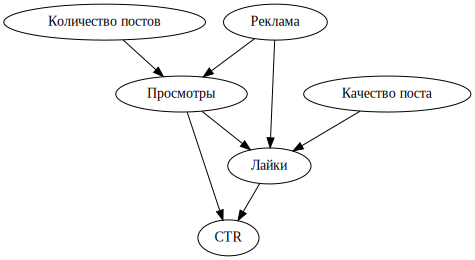

In [64]:
dag = graphviz.Digraph("Каузальные связи перед CTR") #каузальная диаграмма

#узлы 

dag.node("A", "Количество постов")
dag.node("B", "Просмотры")
dag.node("C", "Лайки")
dag.node("D", "CTR")
dag.node("E", "Реклама")
dag.node("F", "Качество поста")

#рёбра

dag.edges(["AB", "BC", "BD", "CD", "EB", "EC", "FC"])

dag

По всей видимости, эффект количества постов через просмотры балансируется его же эффектом через лайки! Но нужно ли здесь ещё что-то делать? Нужно ли учитывать побочные переменные? Корректно ли этот граф отражает реальность? Нужен ли он тут?

Это всё вопросы причинно-следственного вывода - о котором мы слишком много говорить не будем, но в конспекте будет немного полезной литературы на тему.

# Немного каузальности: CausalImpact

АБ-тесты - это, конечно, хорошо. Но не всякие вещи можно проверить с помощью АБ-тестов! Этому могут быть следующие причины:

1. Интересующая нас переменная не подчиняется прямой манипуляции
2. Управлять ей дорого или неэффективно
3. Управлять ей неэтично

Что делать? На самом деле есть очень широкий набор самых разных методик, которые позволяют обходить эту проблему в той или иной степени, объединённых общим названием **Causal Inference**. И один из подходов концептуально очень прост: **мы предсказываем временной ряд, а затем смотрим, насколько сильно предсказания расходятся с реальными показателями после некоторого события**.

Наиболее удобно такая техника реализована в пакете под названием *CausalImpact*. Изначально он [написан на R](https://google.github.io/CausalImpact/CausalImpact.html), но есть [хороший порт](https://github.com/WillianFuks/tfcausalimpact) на питон, построенный на основе [TensorFlow Probability](https://www.tensorflow.org/probability).

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

from causalimpact import CausalImpact

2023-01-30 23:48:50.479112: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-30 23:48:50.479169: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-30 23:48:52.299804: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-30 23:48:52.299910: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-30 23:48:52.299922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

Попробуем насимулировать некоторый достаточно стационарный временной ряд:

<AxesSubplot: >

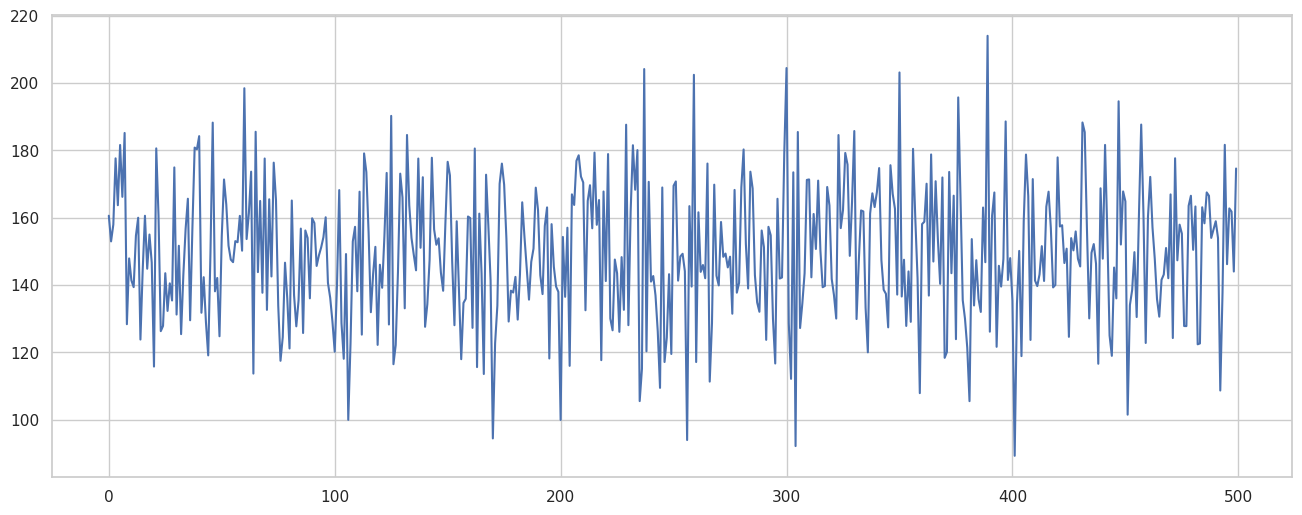

In [66]:
mock_data = np.random.normal(loc=150, scale=20, size=500)

sns.lineplot(mock_data)

Сделаем небольшой сдвиг на последние 50 дней:

<AxesSubplot: >

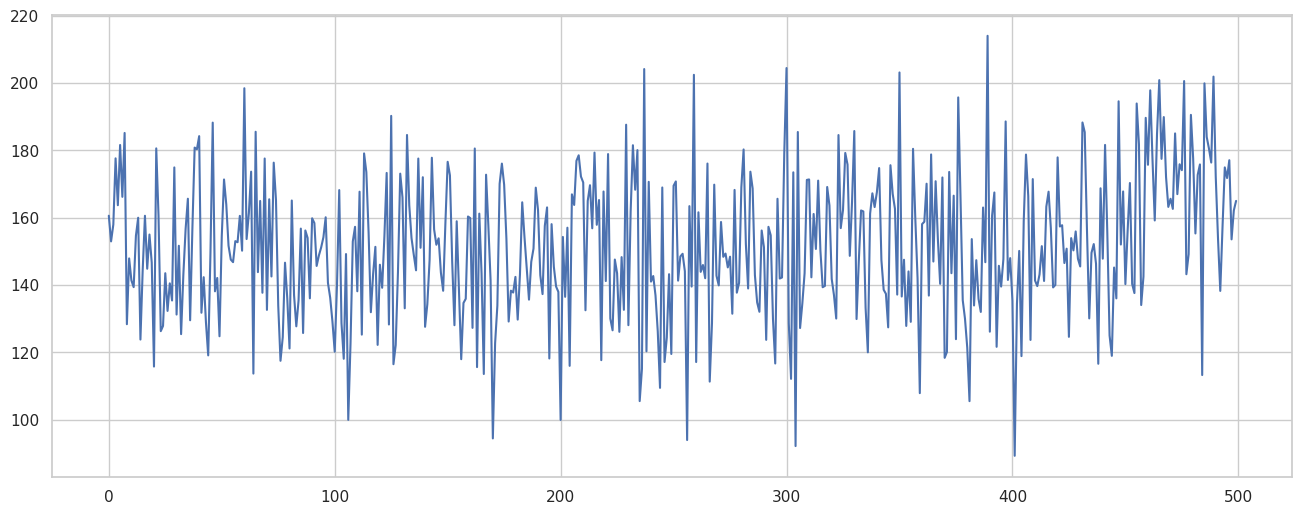

In [67]:
mock_data_2 = mock_data.copy()

mock_data_2[-50:] = np.random.normal(loc=170, scale=20, size=50)

sns.lineplot(mock_data_2)

А теперь строим модельку:

In [68]:
impact = CausalImpact(data=pd.Series(mock_data_2), #данные
                      pre_period=[200, 450], #период до события
                      post_period=[451, 499]) #период после события

2022-10-06 15:26:02.072380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-06 15:26:02.072477: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-06 15:26:02.072595: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-32QL1RT): /proc/driver/nvidia/version does not exist
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps

Рисуем результат:

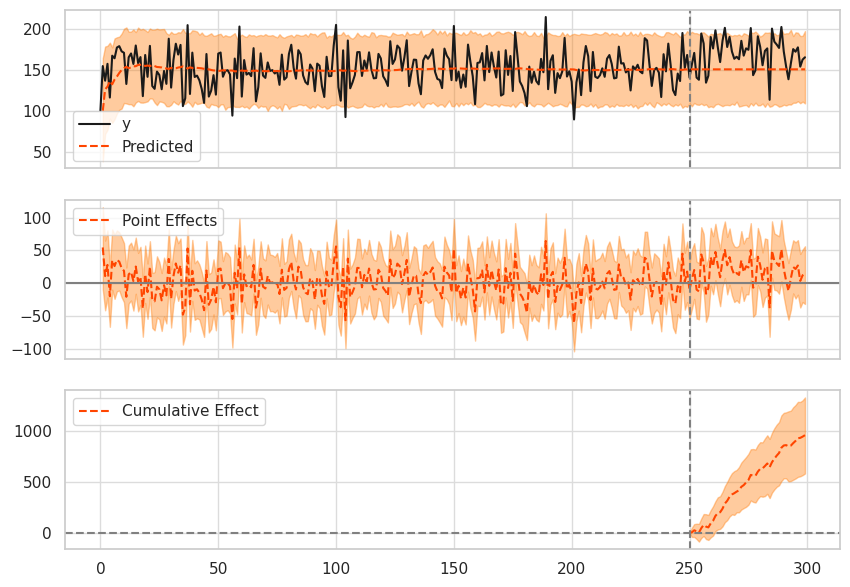

In [69]:
impact.plot()

In [70]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    169.83             8321.84
Prediction (s.d.)         150.3 (3.95)       7364.64 (193.67)
95% CI                    [142.52, 158.01]   [6983.5, 7742.69]

Absolute effect (s.d.)    19.53 (3.95)       957.21 (193.67)
95% CI                    [11.82, 27.31]     [579.16, 1338.34]

Relative effect (s.d.)    13.0% (2.63%)      13.0% (2.63%)
95% CI                    [7.86%, 18.17%]    [7.86%, 18.17%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [71]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 169.83. By contrast, in the absence of an
intervention, we would have expected an average response of 150.3.
The 95% interval of this counterfactual prediction is [142.52, 158.01].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 19.53 with a 95% interval of
[11.82, 27.31]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 8321.84.
By contrast, had the intervention not taken place, we would have expected
a sum of 7364.64. The 95% interval of this prediction is [6983.5, 7742.69].


The above results are given in terms of absolute numbers. In relative
terms, the response 

Такой вариант использования CausalImpact вполне валидный. Однако настоящую мощь этот метод обретает тогда, когда мы используем ковариаты!

**Важное условие**: ковариаты не должны подвергаться воздействию!

<AxesSubplot: >

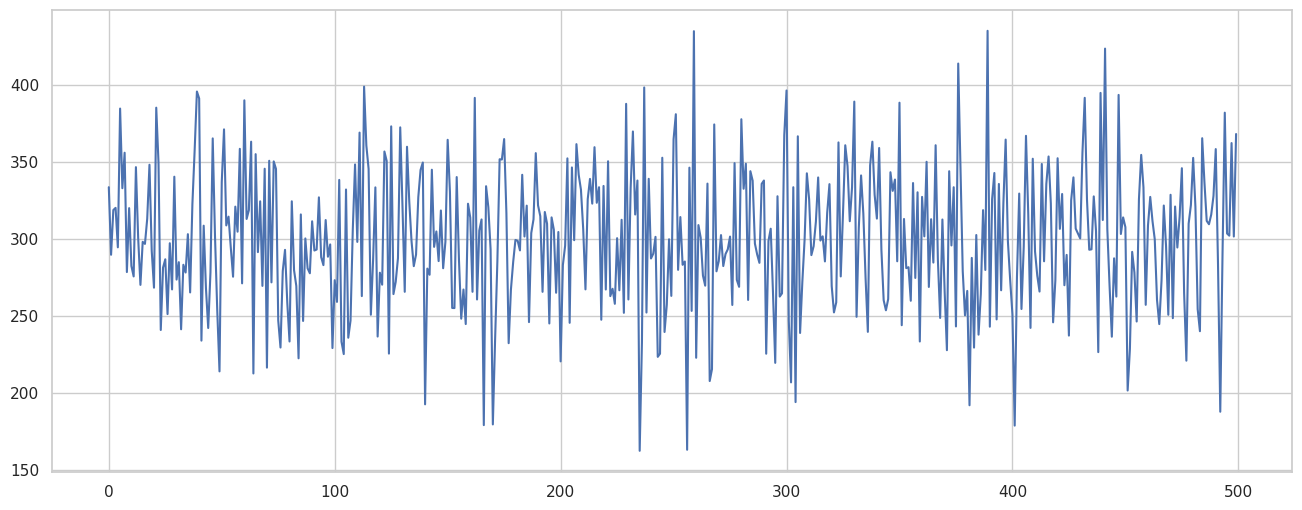

In [72]:
#создадим ковариат

cov_data = mock_data * 2 + np.random.normal(loc=0, scale=20, size=mock_data.size)

sns.lineplot(cov_data)

In [73]:
#протестируем

np.corrcoef(mock_data, cov_data)

array([[1.        , 0.90145289],
       [0.90145289, 1.        ]])

И строим теперь:

In [74]:
impact_2 = CausalImpact(data=pd.DataFrame({"y":mock_data_2, "X":cov_data}), #данные
                      pre_period=[200, 450], #период до события
                      post_period=[451, 499]) #период после события

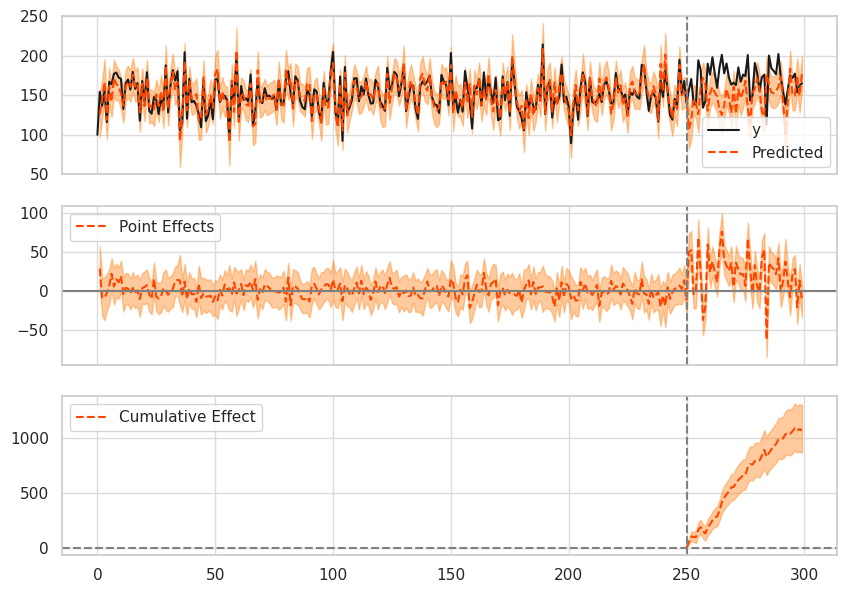

In [75]:
impact_2.plot()

In [76]:
print(impact_2.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    169.83             8321.84
Prediction (s.d.)         148.08 (2.19)      7255.69 (107.11)
95% CI                    [143.56, 152.13]   [7034.44, 7454.32]

Absolute effect (s.d.)    21.76 (2.19)       1066.15 (107.11)
95% CI                    [17.7, 26.27]      [867.52, 1287.4]

Relative effect (s.d.)    14.69% (1.48%)     14.69% (1.48%)
95% CI                    [11.96%, 17.74%]   [11.96%, 17.74%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


Можно также задавать кастомные модели, но это только для [особо заинтересованных](https://www.tensorflow.org/probability/api_docs/python/tfp/sts). 